# SOLUTION: Linear Regression with Statsmodels for Movie Revenue- Part 2

- 04/12/23

## Activity: Create a Linear Regression Model with Statsmodels for Revenue

- Last Class:
    - We started working with JUST the data data from the TMDB API for years 2000-2021. 
    - We prepared the data for modeling
        - Some feature engineering
        - Our usual Preprocessing
        - New steps for statsmodels!
    - We fit a statsmodels linear regression.
    
    
- Today:
    - We Will inspect the model summary.
    - We will create the visualizations to check assumptions about the residuals.
    - We will iterate upon our model until we meet the 4 assumptions as best we can.
    - We will discuss tactics for dealing with violations of the assumptions. 
    - We will use our coefficients to make stakeholder recommendations (if theres time 🤞).

> **[🕹 Click here to jump to Part 2!](#🕹-Part-2:-Checking-Model-Assumptions)**

# 📺 Previously, on...

## Loading the Data

In [120]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
## fixing random for lesson generation
np.random.seed(321)

In [121]:
pd.set_option('display.max_columns',100)

### 📚 Finding & Loading Batches of Files with `glob`

In [122]:
## Checking what data we already in our Data folder using os.listdir
import os
FOLDER = '../Data/'
file_list = sorted(os.listdir(FOLDER))
file_list

['.DS_Store',
 '.ipynb_checkpoints',
 '2010-2021',
 'combined_tmdb_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'title_akas_cleaned.csv.gz',
 'title_basics_cleaned.csv.gz',
 'title_ratings_cleaned.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2002.json',
 'tmdb_api_results_2003.json',
 'tmdb_api_results_2004.json',
 'tmdb_api_results_2005.json',
 'tmdb_api_results_2006.json',
 'tmdb_api_results_2007.json',
 'tmdb_api_results_2008.json',
 'tmdb_api_results_2009.json',
 'tmdb_api_results_2010.json',
 'tmdb_api_results_2011.json',
 'tmdb_api_results_2012.json',
 'tmdb_api_results_2013.json',
 'tmdb_api_results_2014.json',
 'tmdb_api_results_2015.json',
 'tmdb_a

In [123]:
## Try loading in the first .csv.gz file from the list
# pd.read_csv(file_list[1])

> Why isn't it working?

In [124]:
## let's check the filepath 
file_list[1]

'.ipynb_checkpoints'

In [125]:
## add the folder plus filename
FOLDER+ file_list[1]

'../Data/.ipynb_checkpoints'

In [126]:
## try read csv with folder plus filename
# pd.read_csv(FOLDER+ file_list[1])

- Now we would do that in a loop, and only want to open .csv.gz.
- But there is a better way!
>- Introducing `glob`
    - Glob takes a filepath/query and will find every filename that matches the pattern provided.
    - We use asterisks as wildcards in our query.
    


In [127]:
import glob
## Make a filepath query
q = FOLDER+"*.csv.gz"
print(q)

../Data/*.csv.gz


In [128]:
# Use glob.glob to get COMPLETE filepaths
file_list = glob.glob(q)
file_list

['../Data/final_tmdb_data_2006.csv.gz',
 '../Data/title_basics_cleaned.csv.gz',
 '../Data/final_tmdb_data_2008.csv.gz',
 '../Data/final_tmdb_data_2004.csv.gz',
 '../Data/title_ratings_cleaned.csv.gz',
 '../Data/final_tmdb_data_2000.csv.gz',
 '../Data/final_tmdb_data_2002.csv.gz',
 '../Data/combined_tmdb_data.csv.gz',
 '../Data/final_tmdb_data_2007.csv.gz',
 '../Data/final_tmdb_data_2009.csv.gz',
 '../Data/final_tmdb_data_2005.csv.gz',
 '../Data/final_tmdb_data_2001.csv.gz',
 '../Data/title_akas_cleaned.csv.gz',
 '../Data/final_tmdb_data_2003.csv.gz']

In [129]:
# Use glob.glob to get COMPLETE filepaths
q = FOLDER+"final_*.csv.gz"
print(q)
file_list = sorted(glob.glob(q))
file_list

../Data/final_*.csv.gz


['../Data/final_tmdb_data_2000.csv.gz',
 '../Data/final_tmdb_data_2001.csv.gz',
 '../Data/final_tmdb_data_2002.csv.gz',
 '../Data/final_tmdb_data_2003.csv.gz',
 '../Data/final_tmdb_data_2004.csv.gz',
 '../Data/final_tmdb_data_2005.csv.gz',
 '../Data/final_tmdb_data_2006.csv.gz',
 '../Data/final_tmdb_data_2007.csv.gz',
 '../Data/final_tmdb_data_2008.csv.gz',
 '../Data/final_tmdb_data_2009.csv.gz']

> But where are the rest of the years?

In [130]:
## in a sub-folder
os.listdir(FOLDER+'2010-2021')

['final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2021.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2011.csv.gz']

- Recursive Searching with glob.
    - add a `**/` in the middle of your query to grab any matches from all subfolders. 

In [131]:
# Use glob.glob to get COMPLETE filepaths
q = FOLDER+"/**/final_*.csv.gz"
print(q)
file_list = sorted(glob.glob(q,recursive=True))
file_list

../Data//**/final_*.csv.gz


['../Data/2010-2021/final_tmdb_data_2010.csv.gz',
 '../Data/2010-2021/final_tmdb_data_2011.csv.gz',
 '../Data/2010-2021/final_tmdb_data_2012.csv.gz',
 '../Data/2010-2021/final_tmdb_data_2013.csv.gz',
 '../Data/2010-2021/final_tmdb_data_2014.csv.gz',
 '../Data/2010-2021/final_tmdb_data_2015.csv.gz',
 '../Data/2010-2021/final_tmdb_data_2016.csv.gz',
 '../Data/2010-2021/final_tmdb_data_2017.csv.gz',
 '../Data/2010-2021/final_tmdb_data_2018.csv.gz',
 '../Data/2010-2021/final_tmdb_data_2019.csv.gz',
 '../Data/2010-2021/final_tmdb_data_2020.csv.gz',
 '../Data/2010-2021/final_tmdb_data_2021.csv.gz',
 '../Data/final_tmdb_data_2000.csv.gz',
 '../Data/final_tmdb_data_2001.csv.gz',
 '../Data/final_tmdb_data_2002.csv.gz',
 '../Data/final_tmdb_data_2003.csv.gz',
 '../Data/final_tmdb_data_2004.csv.gz',
 '../Data/final_tmdb_data_2005.csv.gz',
 '../Data/final_tmdb_data_2006.csv.gz',
 '../Data/final_tmdb_data_2007.csv.gz',
 '../Data/final_tmdb_data_2008.csv.gz',
 '../Data/final_tmdb_data_2009.csv.gz']

In [132]:
# ## use a list comprehension to load in all files into 1 dataframe
# df = pd.concat([pd.read_csv(f) for f in file_list])
# df

- Dealing with ParserErrors with "possibly malformed files"

    - for a reason I do not fully understand yet, some of the files I downloaded error if I try to read them.
        - "ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.`
    - After some googling, the fix was to add `lineterminator='\n'` to pd.read_csv


In [133]:
## use a list comprehension to load in all files into 1 dataframe
df = pd.concat([pd.read_csv(f,lineterminator='\n') for f in file_list])
df

imdb_id  adult                     backdrop_path  \
0             0    NaN                               NaN   
1     tt0312305   0.00                               NaN   
2     tt0326965   0.00  /xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg   
3     tt0331312   0.00                               NaN   
4     tt0393049   0.00  /gc9FN5zohhzCt05RkejQIIPLtBl.jpg   
...         ...    ...                               ...   
2350  tt7661128   0.00                               NaN   
2351  tt7786614   0.00                               NaN   
2352  tt8170758   0.00                               NaN   
2353  tt9330112   0.00                               NaN   
2354  tt9556198   0.00                               NaN   

                                  belongs_to_collection    budget  \
0                                                   NaN       NaN   
1                                                   NaN      0.00   
2                                                   NaN      0.00   
3                                                   NaN      0.00   
4                                                   NaN 300000.00   
...                                                 ...       ...   
2350                                                NaN      0.00   
2351                                                NaN      0.00   
2352                                                NaN      0.00   
2353                                                NaN      0.00   
2354  {'id': 866148, 'name': 'Deep Sea Monster Raiga...      0.00   

                                                 genres  \
0                                                   NaN   
1     [{'id': 10751, 'name': 'Family'}, {'id': 16, '...   
2     [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...   
3                                                    []   
4     [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
...                                                 ...   
2350                   [{'id': 53, 'name': 'Thriller'}]   
2351                                                 []   
2352                                                 []   
2353  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
2354  [{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...   

                        homepage        id original_language  \
0                            NaN       NaN               NaN   
1     http://www.qqthemovie.com/  23738.00                en   
2       http://www.inmysleep.com  40048.00                en   
3                            NaN 214026.00                en   
4                            NaN 324352.00                en   
...                          ...       ...               ...   
2350                         NaN 595306.00                en   
2351                         NaN 616643.00                en   
2352                         NaN 513464.00                en   
2353                         NaN 111622.00                ta   
2354                         NaN 488412.00                ja   

                              original_title  \
0                                        NaN   
1     Quantum Quest: A Cassini Space Odyssey   
2                                In My Sleep   
3                         This Wretched Life   
4                           Anderson's Cross   
...                                      ...   
2350                          Cold by Nature   
2351                                 Ci qing   
2352         The Swell Season: One Step Away   
2353                    நினைத்தாலே இனிக்கும்   
2354                                   深海獣雷牙   

                                               overview  popularity  \
0                                                   NaN         NaN   
1     Dave, a young photon, who is forced out of the...        2.77   
2     Marcus (Philip WInchester) wakes up in the mid...        6.12   
3     Awakening from a near fatal overdose, Chris em...        0.60   
4     Nick Anderson, Kevin Daniels, and Tracey G

In [134]:
# remove ids that are 0
df = df.loc[ df['imdb_id']!='0']
df

imdb_id  adult                     backdrop_path  \
1     tt0312305   0.00                               NaN   
2     tt0326965   0.00  /xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg   
3     tt0331312   0.00                               NaN   
4     tt0393049   0.00  /gc9FN5zohhzCt05RkejQIIPLtBl.jpg   
5     tt0398286   0.00  /cWczNud8Y8i8ab0Z4bxos4myWYO.jpg   
...         ...    ...                               ...   
2350  tt7661128   0.00                               NaN   
2351  tt7786614   0.00                               NaN   
2352  tt8170758   0.00                               NaN   
2353  tt9330112   0.00                               NaN   
2354  tt9556198   0.00                               NaN   

                                  belongs_to_collection       budget  \
1                                                   NaN         0.00   
2                                                   NaN         0.00   
3                                                   NaN         0.00   
4                                                   NaN    300000.00   
5                                                   NaN 260000000.00   
...                                                 ...          ...   
2350                                                NaN         0.00   
2351                                                NaN         0.00   
2352                                                NaN         0.00   
2353                                                NaN         0.00   
2354  {'id': 866148, 'name': 'Deep Sea Monster Raiga...         0.00   

                                                 genres  \
1     [{'id': 10751, 'name': 'Family'}, {'id': 16, '...   
2     [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...   
3                                                    []   
4     [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
5     [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
...                                                 ...   
2350                   [{'id': 53, 'name': 'Thriller'}]   
2351                                                 []   
2352                                                 []   
2353  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
2354  [{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...   

                                          homepage        id  \
1                       http://www.qqthemovie.com/  23738.00   
2                         http://www.inmysleep.com  40048.00   
3                                              NaN 214026.00   
4                                              NaN 324352.00   
5     http://disney.go.com/disneypictures/tangled/  38757.00   
...                                            ...       ...   
2350                                           NaN 595306.00   
2351                                           NaN 616643.00   
2352                                           NaN 513464.00   
2353                                           NaN 111622.00   
2354                                           NaN 488412.00   

     original_language                          original_title  \
1                   en  Quantum Quest: A Cassini Space Odyssey   
2                   en                             In My Sleep   
3                   en                      This Wretched Life   
4                   en                        Anderson's Cross   
5                   en                                 Tangled   
...                ...                                     ...   
2350                en                          Cold by Nature   
2351                en                                 Ci qing   
2352                en         The Swell Season: One Step Away   
2353                ta                    நினைத்தாலே இனிக்கும்   
2354                ja                                   深海獣雷牙   

                                               overview  popularity  \
1     Dave, a young photon, who is forced out of the...        2.77   
2     Mar

In [135]:
df = df.reset_index(drop=True)
df

imdb_id  adult                     backdrop_path  \
0      tt0312305   0.00                               NaN   
1      tt0326965   0.00  /xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg   
2      tt0331312   0.00                               NaN   
3      tt0393049   0.00  /gc9FN5zohhzCt05RkejQIIPLtBl.jpg   
4      tt0398286   0.00  /cWczNud8Y8i8ab0Z4bxos4myWYO.jpg   
...          ...    ...                               ...   
60125  tt7661128   0.00                               NaN   
60126  tt7786614   0.00                               NaN   
60127  tt8170758   0.00                               NaN   
60128  tt9330112   0.00                               NaN   
60129  tt9556198   0.00                               NaN   

                                   belongs_to_collection       budget  \
0                                                    NaN         0.00   
1                                                    NaN         0.00   
2                                                    NaN         0.00   
3                                                    NaN    300000.00   
4                                                    NaN 260000000.00   
...                                                  ...          ...   
60125                                                NaN         0.00   
60126                                                NaN         0.00   
60127                                                NaN         0.00   
60128                                                NaN         0.00   
60129  {'id': 866148, 'name': 'Deep Sea Monster Raiga...         0.00   

                                                  genres  \
0      [{'id': 10751, 'name': 'Family'}, {'id': 16, '...   
1      [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...   
2                                                     []   
3      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
4      [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
...                                                  ...   
60125                   [{'id': 53, 'name': 'Thriller'}]   
60126                                                 []   
60127                                                 []   
60128  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
60129  [{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...   

                                           homepage        id  \
0                        http://www.qqthemovie.com/  23738.00   
1                          http://www.inmysleep.com  40048.00   
2                                               NaN 214026.00   
3                                               NaN 324352.00   
4      http://disney.go.com/disneypictures/tangled/  38757.00   
...                                             ...       ...   
60125                                           NaN 595306.00   
60126                                           NaN 616643.00   
60127                                           NaN 513464.00   
60128                                           NaN 111622.00   
60129                                           NaN 488412.00   

      original_language                          original_title  \
0                    en  Quantum Quest: A Cassini Space Odyssey   
1                    en                             In My Sleep   
2                    en                      This Wretched Life   
3                    en                        Anderson's Cross   
4                    en                                 Tangled   
...                 ...                                     ...   
60125                en                          Cold by Nature   
60126                en                                 Ci qing   
60127                en         The Swell Season: One Step Away   
60128                ta                    நினைத்தாலே இனிக்கும்   
60129                ja                                   深海獣雷牙   

                                                overview  popularity  \
0      Dave, a young

In [136]:
## saving the combined csv to disk
df.to_csv(FOLDER+'combined_tmdb_data.csv.gz',compression='gzip',index=False)

df = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz',lineterminator='\n')
df

imdb_id  adult                     backdrop_path  \
0      tt0312305   0.00                               NaN   
1      tt0326965   0.00  /xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg   
2      tt0331312   0.00                               NaN   
3      tt0393049   0.00  /gc9FN5zohhzCt05RkejQIIPLtBl.jpg   
4      tt0398286   0.00  /cWczNud8Y8i8ab0Z4bxos4myWYO.jpg   
...          ...    ...                               ...   
60125  tt7661128   0.00                               NaN   
60126  tt7786614   0.00                               NaN   
60127  tt8170758   0.00                               NaN   
60128  tt9330112   0.00                               NaN   
60129  tt9556198   0.00                               NaN   

                                   belongs_to_collection       budget  \
0                                                    NaN         0.00   
1                                                    NaN         0.00   
2                                                    NaN         0.00   
3                                                    NaN    300000.00   
4                                                    NaN 260000000.00   
...                                                  ...          ...   
60125                                                NaN         0.00   
60126                                                NaN         0.00   
60127                                                NaN         0.00   
60128                                                NaN         0.00   
60129  {'id': 866148, 'name': 'Deep Sea Monster Raiga...         0.00   

                                                  genres  \
0      [{'id': 10751, 'name': 'Family'}, {'id': 16, '...   
1      [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...   
2                                                     []   
3      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
4      [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
...                                                  ...   
60125                   [{'id': 53, 'name': 'Thriller'}]   
60126                                                 []   
60127                                                 []   
60128  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
60129  [{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...   

                                           homepage        id  \
0                        http://www.qqthemovie.com/  23738.00   
1                          http://www.inmysleep.com  40048.00   
2                                               NaN 214026.00   
3                                               NaN 324352.00   
4      http://disney.go.com/disneypictures/tangled/  38757.00   
...                                             ...       ...   
60125                                           NaN 595306.00   
60126                                           NaN 616643.00   
60127                                           NaN 513464.00   
60128                                           NaN 111622.00   
60129                                           NaN 488412.00   

      original_language                          original_title  \
0                    en  Quantum Quest: A Cassini Space Odyssey   
1                    en                             In My Sleep   
2                    en                      This Wretched Life   
3                    en                        Anderson's Cross   
4                    en                                 Tangled   
...                 ...                                     ...   
60125                en                          Cold by Nature   
60126                en                                 Ci qing   
60127                en         The Swell Season: One Step Away   
60128                ta                    நினைத்தாலே இனிக்கும்   
60129                ja                                   深海獣雷牙   

                                                overview  popularity  \
0      Dave, a young

## Preprocessing

In [137]:
## Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','tagline','id','homepage', 'status',
                 'production_countries','video','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df

imdb_id  adult                              belongs_to_collection  \
0      tt0312305   0.00                                                NaN   
1      tt0326965   0.00                                                NaN   
2      tt0331312   0.00                                                NaN   
3      tt0393049   0.00                                                NaN   
4      tt0398286   0.00                                                NaN   
...          ...    ...                                                ...   
60125  tt7661128   0.00                                                NaN   
60126  tt7786614   0.00                                                NaN   
60127  tt8170758   0.00                                                NaN   
60128  tt9330112   0.00                                                NaN   
60129  tt9556198   0.00  {'id': 866148, 'name': 'Deep Sea Monster Raiga...   

            budget                                             genres  \
0             0.00  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...   
1             0.00  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...   
2             0.00                                                 []   
3        300000.00  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
4     260000000.00  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
...            ...                                                ...   
60125         0.00                   [{'id': 53, 'name': 'Thriller'}]   
60126         0.00                                                 []   
60127         0.00                                                 []   
60128         0.00  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
60129         0.00  [{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...   

       popularity                               production_companies  \
0            2.77                                                 []   
1            6.12                                                 []   
2            0.60                                                 []   
3            2.42  [{'id': 46102, 'logo_path': None, 'name': 'Ill...   
4          119.17  [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...   
...           ...                                                ...   
60125        0.60  [{'id': 117146, 'logo_path': None, 'name': 'JE...   
60126        0.60                                                 []   
60127        0.60                                                 []   
60128        1.20                                                 []   
60129        0.84  [{'id': 64599, 'logo_path': None, 'name': 'SRS...   

      release_date      revenue  runtime  \
0       2012-12-02         0.00    45.00   
1       2010-04-23         0.00    90.00   
2       2010-01-01         0.00     0.00   
3       2010-05-20         0.00    98.00   
4       2010-11-24 592461732.00   100.00   
...            ...          ...      ...   
60125   2009-09-01    250000.00    77.00   
60126   2009-01-01         0.00   100.00   
60127   2009-10-27         0.00    61.00   
60128   2009-09-04         0.00   145.00   
60129   2009-08-15         0.00    80.00   

                                        title  vote_average  vote_count  \
0      Quantum Quest: A Cassini Space Odyssey          8.40        7.00   
1                                 In My Sleep          5.50       31.00   
2                          This Wretched Life          5.00        1.00   
3                            Anderson's Cross          4.00        5.00   
4                                     Tangled          7.60     9364.00   
...                                       ...           ...         ...   
60125                          Cold by Nature          0.00        0.00   
60126                                  Tattoo          5.00        1.00   
60127         The Swell Season: One Step Away          0.00        0.00   
60128                      Ninaithale Inikkum      

### Feature Engineering


- Collection: convert to boolean
- Genres: get just name and OHE
- Cleaning Certification
- Converting release date to year, month, and day.

#### belongs to collection

In [138]:
# there are 3,700+ movies that belong to collections
df['belongs_to_collection'].notna().sum()

3738

In [139]:
## Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    56392
True      3738
Name: belongs_to_collection, dtype: int64

#### genre

In [140]:
## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [141]:
## Use ourn function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode

imdb_id  adult  belongs_to_collection  budget  \
0      tt0312305   0.00                  False    0.00   
0      tt0312305   0.00                  False    0.00   
0      tt0312305   0.00                  False    0.00   
1      tt0326965   0.00                  False    0.00   
1      tt0326965   0.00                  False    0.00   
...          ...    ...                    ...     ...   
60128  tt9330112   0.00                  False    0.00   
60128  tt9330112   0.00                  False    0.00   
60128  tt9330112   0.00                  False    0.00   
60129  tt9556198   0.00                   True    0.00   
60129  tt9556198   0.00                   True    0.00   

                                                  genres  popularity  \
0      [{'id': 10751, 'name': 'Family'}, {'id': 16, '...        2.77   
0      [{'id': 10751, 'name': 'Family'}, {'id': 16, '...        2.77   
0      [{'id': 10751, 'name': 'Family'}, {'id': 16, '...        2.77   
1      [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...        6.12   
1      [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...        6.12   
...                                                  ...         ...   
60128  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...        1.20   
60128  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...        1.20   
60128  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...        1.20   
60129  [{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...        0.84   
60129  [{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...        0.84   

                                    production_companies release_date  \
0                                                     []   2012-12-02   
0                                                     []   2012-12-02   
0                                                     []   2012-12-02   
1                                                     []   2010-04-23   
1                                                     []   2010-04-23   
...                                                  ...          ...   
60128                                                 []   2009-09-04   
60128                                                 []   2009-09-04   
60128                                                 []   2009-09-04   
60129  [{'id': 64599, 'logo_path': None, 'name': 'SRS...   2009-08-15   
60129  [{'id': 64599, 'logo_path': None, 'name': 'SRS...   2009-08-15   

       revenue  runtime                                   title  vote_average  \
0         0.00    45.00  Quantum Quest: A Cassini Space Odyssey          8.40   
0         0.00    45.00  Quantum Quest: A Cassini Space Odyssey          8.40   
0         0.00    45.00  Quantum Quest: A Cassini Space Odyssey          8.40   
1         0.00    90.00                             In My Sleep          5.50   
1         0.00    90.00                             In My Sleep          5.50   
...        ...      ...                                     ...           ...   
60128     0.00   145.00                      Ninaithale Inikkum          4.00   
60128     0.00   145.00                      Ninaithale Inikkum          4.00   
60128     0.00   145.00                      Ninaithale Inikkum          4.00   
60129     0.00    80.00                  Deep Sea Monster Raiga          7.70   
60129     0.00    80.00                  Deep Sea Monster Raiga          7.70   

       vote_count certification      genres_list  
0            7.00           NaN           Family  
0            7.00           NaN        Animation  
0            7.00           NaN  Science Fiction  
1           31.00         PG-13         Thriller  
1           31.00         PG-13          Mystery  
...           ...           ...              ...  
60128        1.00           NaN            Drama  
60128        1.00           NaN         Thriller  
60128        1.00           NaN          Mystery  
60129        3.00           NaN           Action  
60129        3.00           NaN     

In [142]:
## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Family', 'Animation', 'Science Fiction', 'Thriller', 'Mystery',
       'Drama', 'Romance', 'Comedy', 'War', 'Crime', 'Action',
       'Adventure', 'Horror', 'Fantasy', 'History', 'Western', 'Music',
       'Documentary', 'TV Movie'], dtype=object)

In [143]:
## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex=False)    
df

imdb_id  adult  belongs_to_collection       budget  \
0      tt0312305   0.00                  False         0.00   
1      tt0326965   0.00                  False         0.00   
2      tt0331312   0.00                  False         0.00   
3      tt0393049   0.00                  False    300000.00   
4      tt0398286   0.00                  False 260000000.00   
...          ...    ...                    ...          ...   
60125  tt7661128   0.00                  False         0.00   
60126  tt7786614   0.00                  False         0.00   
60127  tt8170758   0.00                  False         0.00   
60128  tt9330112   0.00                  False         0.00   
60129  tt9556198   0.00                   True         0.00   

                                                  genres  popularity  \
0      [{'id': 10751, 'name': 'Family'}, {'id': 16, '...        2.77   
1      [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...        6.12   
2                                                     []        0.60   
3      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...        2.42   
4      [{'id': 16, 'name': 'Animation'}, {'id': 10751...      119.17   
...                                                  ...         ...   
60125                   [{'id': 53, 'name': 'Thriller'}]        0.60   
60126                                                 []        0.60   
60127                                                 []        0.60   
60128  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...        1.20   
60129  [{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...        0.84   

                                    production_companies release_date  \
0                                                     []   2012-12-02   
1                                                     []   2010-04-23   
2                                                     []   2010-01-01   
3      [{'id': 46102, 'logo_path': None, 'name': 'Ill...   2010-05-20   
4      [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...   2010-11-24   
...                                                  ...          ...   
60125  [{'id': 117146, 'logo_path': None, 'name': 'JE...   2009-09-01   
60126                                                 []   2009-01-01   
60127                                                 []   2009-10-27   
60128                                                 []   2009-09-04   
60129  [{'id': 64599, 'logo_path': None, 'name': 'SRS...   2009-08-15   

           revenue  runtime                                   title  \
0             0.00    45.00  Quantum Quest: A Cassini Space Odyssey   
1             0.00    90.00                             In My Sleep   
2             0.00     0.00                      This Wretched Life   
3             0.00    98.00                        Anderson's Cross   
4     592461732.00   100.00                                 Tangled   
...            ...      ...                                     ...   
60125    250000.00    77.00                          Cold by Nature   
60126         0.00   100.00                                  Tattoo   
60127         0.00    61.00         The Swell Season: One Step Away   
60128         0.00   145.00                      Ninaithale Inikkum   
60129         0.00    80.00                  Deep Sea Monster Raiga   

       vote_average  vote_count certification  \
0              8.40        7.00           NaN   
1              5.50       31.00         PG-13   
2              5.00        1.00           NaN   
3              4.00        5.00           NaN   
4              7.60     9364.00            PG   
...             ...         ...           ...   
60125          0.00        0.00         PG-13   
60126          5.00        1.00           NaN   
60127          0.00        0.00            NR   
60128          4.00        1.00           NaN   
60129          7.70        3.00           NaN   

                                genres_list  Genre_Family  Genre_Ani

In [144]:
## Drop original genre cols
df = df.drop(columns=['genres','genres_list'])
df

imdb_id  adult  belongs_to_collection       budget  popularity  \
0      tt0312305   0.00                  False         0.00        2.77   
1      tt0326965   0.00                  False         0.00        6.12   
2      tt0331312   0.00                  False         0.00        0.60   
3      tt0393049   0.00                  False    300000.00        2.42   
4      tt0398286   0.00                  False 260000000.00      119.17   
...          ...    ...                    ...          ...         ...   
60125  tt7661128   0.00                  False         0.00        0.60   
60126  tt7786614   0.00                  False         0.00        0.60   
60127  tt8170758   0.00                  False         0.00        0.60   
60128  tt9330112   0.00                  False         0.00        1.20   
60129  tt9556198   0.00                   True         0.00        0.84   

                                    production_companies release_date  \
0                                                     []   2012-12-02   
1                                                     []   2010-04-23   
2                                                     []   2010-01-01   
3      [{'id': 46102, 'logo_path': None, 'name': 'Ill...   2010-05-20   
4      [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...   2010-11-24   
...                                                  ...          ...   
60125  [{'id': 117146, 'logo_path': None, 'name': 'JE...   2009-09-01   
60126                                                 []   2009-01-01   
60127                                                 []   2009-10-27   
60128                                                 []   2009-09-04   
60129  [{'id': 64599, 'logo_path': None, 'name': 'SRS...   2009-08-15   

           revenue  runtime                                   title  \
0             0.00    45.00  Quantum Quest: A Cassini Space Odyssey   
1             0.00    90.00                             In My Sleep   
2             0.00     0.00                      This Wretched Life   
3             0.00    98.00                        Anderson's Cross   
4     592461732.00   100.00                                 Tangled   
...            ...      ...                                     ...   
60125    250000.00    77.00                          Cold by Nature   
60126         0.00   100.00                                  Tattoo   
60127         0.00    61.00         The Swell Season: One Step Away   
60128         0.00   145.00                      Ninaithale Inikkum   
60129         0.00    80.00                  Deep Sea Monster Raiga   

       vote_average  vote_count certification  Genre_Family  Genre_Animation  \
0              8.40        7.00           NaN          True             True   
1              5.50       31.00         PG-13         False            False   
2              5.00        1.00           NaN         False            False   
3              4.00        5.00           NaN         False            False   
4              7.60     9364.00            PG          True             True   
...             ...         ...           ...           ...              ...   
60125          0.00        0.00         PG-13         False            False   
60126          5.00        1.00           NaN         False            False   
60127          0.00        0.00            NR         False            False   
60128          4.00        1.00           NaN         False            False   
60129          7.70        3.00           NaN         False            False   

       Genre_Science Fiction  Genre_Thriller  Genre_Mystery  Genre_Drama  \
0                       True           False          False        False   
1                      False            True           True         True   
2                      False           False          False        False   
3                      False           False          False         True   
4                      False         

#### certification

In [145]:
## Checking Certification values
df['certification'].value_counts(dropna=False)

NaN                                45506
R                                   6097
NR                                  3261
PG-13                               3224
PG                                  1432
G                                    442
NC-17                                156
Unrated                                5
R                                      1
PG-13                                  1
10                                     1
-                                      1
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
Name: certification, dtype: int64

In [146]:
# fix extra space certs
df['certification'] = df['certification'].str.strip()

In [147]:
## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      45507
R         6098
NR        3270
PG-13     3225
PG        1432
G          442
NC-17      156
Name: certification, dtype: int64

#### Converting year to sep features

In [148]:
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df

imdb_id  adult  belongs_to_collection       budget  popularity  \
0      tt0312305   0.00                  False         0.00        2.77   
1      tt0326965   0.00                  False         0.00        6.12   
2      tt0331312   0.00                  False         0.00        0.60   
3      tt0393049   0.00                  False    300000.00        2.42   
4      tt0398286   0.00                  False 260000000.00      119.17   
...          ...    ...                    ...          ...         ...   
60125  tt7661128   0.00                  False         0.00        0.60   
60126  tt7786614   0.00                  False         0.00        0.60   
60127  tt8170758   0.00                  False         0.00        0.60   
60128  tt9330112   0.00                  False         0.00        1.20   
60129  tt9556198   0.00                   True         0.00        0.84   

                                    production_companies release_date  \
0                                                     []   2012-12-02   
1                                                     []   2010-04-23   
2                                                     []   2010-01-01   
3      [{'id': 46102, 'logo_path': None, 'name': 'Ill...   2010-05-20   
4      [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...   2010-11-24   
...                                                  ...          ...   
60125  [{'id': 117146, 'logo_path': None, 'name': 'JE...   2009-09-01   
60126                                                 []   2009-01-01   
60127                                                 []   2009-10-27   
60128                                                 []   2009-09-04   
60129  [{'id': 64599, 'logo_path': None, 'name': 'SRS...   2009-08-15   

           revenue  runtime                                   title  \
0             0.00    45.00  Quantum Quest: A Cassini Space Odyssey   
1             0.00    90.00                             In My Sleep   
2             0.00     0.00                      This Wretched Life   
3             0.00    98.00                        Anderson's Cross   
4     592461732.00   100.00                                 Tangled   
...            ...      ...                                     ...   
60125    250000.00    77.00                          Cold by Nature   
60126         0.00   100.00                                  Tattoo   
60127         0.00    61.00         The Swell Season: One Step Away   
60128         0.00   145.00                      Ninaithale Inikkum   
60129         0.00    80.00                  Deep Sea Monster Raiga   

       vote_average  vote_count certification  Genre_Family  Genre_Animation  \
0              8.40        7.00           NaN          True             True   
1              5.50       31.00         PG-13         False            False   
2              5.00        1.00           NaN         False            False   
3              4.00        5.00           NaN         False            False   
4              7.60     9364.00            PG          True             True   
...             ...         ...           ...           ...              ...   
60125          0.00        0.00         PG-13         False            False   
60126          5.00        1.00           NaN         False            False   
60127          0.00        0.00            NR         False            False   
60128          4.00        1.00           NaN         False            False   
60129          7.70        3.00           NaN         False            False   

       Genre_Science Fiction  Genre_Thriller  Genre_Mystery  Genre_Drama  \
0                       True           False          False        False   
1                      False            True           True         True   
2                      False           False          False        False   
3                      False           False          False         True   
4                      False         

In [149]:
df[df['release_date'].isna()]

imdb_id  adult  belongs_to_collection   budget  popularity  \
246    tt1160376   0.00                  False     0.00        0.60   
247    tt1161421   0.00                  False     0.00        1.62   
279    tt1189267   0.00                  False     0.00        0.62   
708    tt1381773   0.00                  False 27000.00        0.60   
1012   tt1482451   0.00                  False     0.00        0.60   
...          ...    ...                    ...      ...         ...   
60057  tt2130186   0.00                  False     0.00        0.60   
60081  tt2596914   0.00                  False    95.00        0.62   
60084  tt2658190   0.00                  False     0.00        0.60   
60108  tt4572686   0.00                  False     0.00        0.60   
60111  tt5235668   0.00                  False     0.00        0.60   

      production_companies release_date  revenue  runtime  \
246                     []          NaN     0.00    90.00   
247                     []          NaN 14500.00   100.00   
279                     []          NaN     0.00     0.00   
708                     []          NaN     0.00   119.00   
1012                    []          NaN     0.00      NaN   
...                    ...          ...      ...      ...   
60057                   []          NaN     0.00   105.00   
60081                   []          NaN     0.00     0.00   
60084                   []          NaN     0.00     0.00   
60108                   []          NaN     0.00    91.00   
60111                   []          NaN     0.00   100.00   

                                          title  vote_average  vote_count  \
246                              Unholy Reunion          2.00        1.00   
247    Harvey Putter and the Ridiculous Premise          6.00        1.00   
279                                    Woodshop          5.00        1.00   
708                             A Genesis Found          5.30        2.00   
1012                               Florida Road          0.00        0.00   
...                                         ...           ...         ...   
60057                       Running 4 President          0.00        0.00   
60081            Con la muerte en los 2 tacones          7.00        1.00   
60084                      Mundaren Bira, Doan!          0.00        0.00   
60108                                  Vanguard          0.00        0.00   
60111                                         X          0.00        0.00   

      certification  Genre_Family  Genre_Animation  Genre_Science Fiction  \
246             NaN         False            False                  False   
247             NaN         False            False                  False   
279             NaN         False            False                  False   
708             NaN         False            False                   True   
1012            NaN         False            False                  False   
...             ...           ...              ...                    ...   
60057           NaN         False            False                  False   
60081           NaN         False            False                  False   
60084           NaN         False            False                  False   
60108           NaN         False            False                  False   
60111           NaN         False            False                  False   

       Genre_Thriller  Genre_Mystery  Genre_Drama  Genre_Romance  \
246             False          False        False          False   
247             False          False        False          False   
279             False          False         True          False   
708             False          False         True          False   
1012            False          False        False          False   
...               ...            ...          ...            ...   
60057           False          False        False          False   
60081           False        

In [150]:
## drop original feature
df = df.drop(columns=['release_date'])

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60130 entries, 0 to 60129
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                60130 non-null  object 
 1   adult                  60130 non-null  float64
 2   belongs_to_collection  60130 non-null  bool   
 3   budget                 60130 non-null  float64
 4   popularity             60130 non-null  float64
 5   production_companies   60130 non-null  object 
 6   revenue                60130 non-null  float64
 7   runtime                59298 non-null  float64
 8   title                  60130 non-null  object 
 9   vote_average           60130 non-null  float64
 10  vote_count             60130 non-null  float64
 11  certification          14623 non-null  object 
 12  Genre_Family           60130 non-null  bool   
 13  Genre_Animation        60130 non-null  bool   
 14  Genre_Science Fiction  60130 non-null  bool   
 15  Ge

## Train Test Split

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60130 entries, 0 to 60129
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                60130 non-null  object 
 1   adult                  60130 non-null  float64
 2   belongs_to_collection  60130 non-null  bool   
 3   budget                 60130 non-null  float64
 4   popularity             60130 non-null  float64
 5   production_companies   60130 non-null  object 
 6   revenue                60130 non-null  float64
 7   runtime                59298 non-null  float64
 8   title                  60130 non-null  object 
 9   vote_average           60130 non-null  float64
 10  vote_count             60130 non-null  float64
 11  certification          14623 non-null  object 
 12  Genre_Family           60130 non-null  bool   
 13  Genre_Animation        60130 non-null  bool   
 14  Genre_Science Fiction  60130 non-null  bool   
 15  Ge

In [153]:
df['production_companies']

0                                                       []
1                                                       []
2                                                       []
3        [{'id': 46102, 'logo_path': None, 'name': 'Ill...
4        [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...
                               ...                        
60125    [{'id': 117146, 'logo_path': None, 'name': 'JE...
60126                                                   []
60127                                                   []
60128                                                   []
60129    [{'id': 64599, 'logo_path': None, 'name': 'SRS...
Name: production_companies, Length: 60130, dtype: object

In [154]:
drop_for_model = ['title','imdb_id','production_companies']
df = df.drop(columns=drop_for_model)
df

adult  belongs_to_collection       budget  popularity      revenue  \
0       0.00                  False         0.00        2.77         0.00   
1       0.00                  False         0.00        6.12         0.00   
2       0.00                  False         0.00        0.60         0.00   
3       0.00                  False    300000.00        2.42         0.00   
4       0.00                  False 260000000.00      119.17 592461732.00   
...      ...                    ...          ...         ...          ...   
60125   0.00                  False         0.00        0.60    250000.00   
60126   0.00                  False         0.00        0.60         0.00   
60127   0.00                  False         0.00        0.60         0.00   
60128   0.00                  False         0.00        1.20         0.00   
60129   0.00                   True         0.00        0.84         0.00   

       runtime  vote_average  vote_count certification  Genre_Family  \
0        45.00          8.40        7.00           NaN          True   
1        90.00          5.50       31.00         PG-13         False   
2         0.00          5.00        1.00           NaN         False   
3        98.00          4.00        5.00           NaN         False   
4       100.00          7.60     9364.00            PG          True   
...        ...           ...         ...           ...           ...   
60125    77.00          0.00        0.00         PG-13         False   
60126   100.00          5.00        1.00           NaN         False   
60127    61.00          0.00        0.00            NR         False   
60128   145.00          4.00        1.00           NaN         False   
60129    80.00          7.70        3.00           NaN         False   

       Genre_Animation  Genre_Science Fiction  Genre_Thriller  Genre_Mystery  \
0                 True                   True           False          False   
1                False                  False            True           True   
2                False                  False           False          False   
3                False                  False           False          False   
4                 True                  False           False          False   
...                ...                    ...             ...            ...   
60125            False                  False            True          False   
60126            False                  False           False          False   
60127            False                  False           False          False   
60128            False                  False            True           True   
60129            False                  False           False          False   

       Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  \
0            False          False         False      False        False   
1             True          False         False      False        False   
2            False          False         False      False        False   
3             True           True          True      False        False   
4            False          False         False      False        False   
...            ...            ...           ...        ...          ...   
60125        False          False         False      False        False   
60126        False          False         False      False        False   
60127        False          False         False      False        False   
60128         True          False         False      False        False   
60129        False          False         False      False        False   

       Genre_Action  Genre_Adventure  Genre_Horror  Genre_Fantasy  \
0             False            False         False          False   
1             False            False         False          False   
2             False            False         False          False   
3             False            False         False          False   
4         

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60130 entries, 0 to 60129
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  60130 non-null  float64
 1   belongs_to_collection  60130 non-null  bool   
 2   budget                 60130 non-null  float64
 3   popularity             60130 non-null  float64
 4   revenue                60130 non-null  float64
 5   runtime                59298 non-null  float64
 6   vote_average           60130 non-null  float64
 7   vote_count             60130 non-null  float64
 8   certification          14623 non-null  object 
 9   Genre_Family           60130 non-null  bool   
 10  Genre_Animation        60130 non-null  bool   
 11  Genre_Science Fiction  60130 non-null  bool   
 12  Genre_Thriller         60130 non-null  bool   
 13  Genre_Mystery          60130 non-null  bool   
 14  Genre_Drama            60130 non-null  bool   
 15  Ge

In [156]:
## Make x and y variables
y = df['revenue'].copy()
X = df.drop(columns=['revenue']).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y)#, random_state=321)
X_train.head()

adult  belongs_to_collection    budget  popularity  runtime  \
9538    0.00                  False      0.00        1.11    80.00   
16553   0.00                  False      0.00        1.88    92.00   
34106   0.00                  False      0.00        1.50   101.00   
3804    0.00                  False      0.00        1.51   100.00   
37747   0.00                  False 300000.00        0.60   138.00   

       vote_average  vote_count certification  Genre_Family  Genre_Animation  \
9538           5.30        5.00           NaN          True            False   
16553          6.00        2.00           NaN         False            False   
34106          2.00        1.00             R         False            False   
3804           7.70        3.00            PG         False            False   
37747          5.00        2.00           NaN         False            False   

       Genre_Science Fiction  Genre_Thriller  Genre_Mystery  Genre_Drama  \
9538                   False           False          False         True   
16553                  False           False          False         True   
34106                  False           False          False        False   
3804                    True           False          False        False   
37747                  False           False          False        False   

       Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  Genre_Action  \
9538           False          True      False        False         False   
16553          False         False      False        False         False   
34106          False          True      False        False         False   
3804           False          True      False        False         False   
37747          False         False      False        False         False   

       Genre_Adventure  Genre_Horror  Genre_Fantasy  Genre_History  \
9538             False         False          False          False   
16553            False         False          False          False   
34106            False         False          False          False   
3804              True         False          False          False   
37747            False         False          False          False   

       Genre_Western  Genre_Music  Genre_Documentary  Genre_TV Movie    year  \
9538           False        False              False           False 2013.00   
16553          False        False              False           False 2015.00   
34106          False        False              False           False 2020.00   
3804           False        False              False           False 2011.00   
37747          False        False              False           False 2020.00   

       month   day  
9538   10.00  1.00  
16553   4.00 15.00  
34106  11.00  4.00  
3804    9.00 24.00  
37747   9.00 18.00

In [157]:
X_train.isna().sum()

adult                        0
belongs_to_collection        0
budget                       0
popularity                   0
runtime                    638
vote_average                 0
vote_count                   0
certification            34082
Genre_Family                 0
Genre_Animation              0
Genre_Science Fiction        0
Genre_Thriller               0
Genre_Mystery                0
Genre_Drama                  0
Genre_Romance                0
Genre_Comedy                 0
Genre_War                    0
Genre_Crime                  0
Genre_Action                 0
Genre_Adventure              0
Genre_Horror                 0
Genre_Fantasy                0
Genre_History                0
Genre_Western                0
Genre_Music                  0
Genre_Documentary            0
Genre_TV Movie               0
year                       792
month                      792
day                        792
dtype: int64

In [158]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['certification']

In [159]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day']

In [160]:
## select manually OHE cols for later
bool_select = make_column_selector(dtype_include='bool')
already_ohe_cols = bool_select(X_train)
already_ohe_cols

['belongs_to_collection',
 'Genre_Family',
 'Genre_Animation',
 'Genre_Science Fiction',
 'Genre_Thriller',
 'Genre_Mystery',
 'Genre_Drama',
 'Genre_Romance',
 'Genre_Comedy',
 'Genre_War',
 'Genre_Crime',
 'Genre_Action',
 'Genre_Adventure',
 'Genre_Horror',
 'Genre_Fantasy',
 'Genre_History',
 'Genre_Western',
 'Genre_Music',
 'Genre_Documentary',
 'Genre_TV Movie']

In [161]:
## convert manual ohe to int
X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

In [162]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )

preprocessor = make_column_transformer((num_pipe, num_cols),
                                       (cat_pipe,cat_cols),remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'runtime',
                                  'vote_average', 'vote_count', 'year', 'month',
                                  'day']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['certification'])])

In [163]:
## fit the col transformer
preprocessor.fit(X_train)

## Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-2']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [164]:
## B) Using list-slicing to find the encoder 
cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)


## Create the empty list
final_features = [*num_cols,*cat_features,*already_ohe_cols]
len(final_features)

36

In [165]:
preprocessor.transform(X_train).shape

(45097, 36)

In [166]:
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
X_train_tf.head()


adult    budget  popularity  runtime  vote_average  vote_count    year  \
9538    0.00      0.00        1.11    80.00          5.30        5.00 2013.00   
16553   0.00      0.00        1.88    92.00          6.00        2.00 2015.00   
34106   0.00      0.00        1.50   101.00          2.00        1.00 2020.00   
3804    0.00      0.00        1.51   100.00          7.70        3.00 2011.00   
37747   0.00 300000.00        0.60   138.00          5.00        2.00 2020.00   

       month   day  certification_G  certification_MISSING  \
9538   10.00  1.00             0.00                   1.00   
16553   4.00 15.00             0.00                   1.00   
34106  11.00  4.00             0.00                   0.00   
3804    9.00 24.00             0.00                   0.00   
37747   9.00 18.00             0.00                   1.00   

       certification_NC-17  certification_NR  certification_PG  \
9538                  0.00              0.00              0.00   
16553                 0.00              0.00              0.00   
34106                 0.00              0.00              0.00   
3804                  0.00              0.00              1.00   
37747                 0.00              0.00              0.00   

       certification_PG-13  certification_R  belongs_to_collection  \
9538                  0.00             0.00                   0.00   
16553                 0.00             0.00                   0.00   
34106                 0.00             1.00                   0.00   
3804                  0.00             0.00                   0.00   
37747                 0.00             0.00                   0.00   

       Genre_Family  Genre_Animation  Genre_Science Fiction  Genre_Thriller  \
9538           1.00             0.00                   0.00            0.00   
16553          0.00             0.00                   0.00            0.00   
34106          0.00             0.00                   0.00            0.00   
3804           0.00             0.00                   1.00            0.00   
37747          0.00             0.00                   0.00            0.00   

       Genre_Mystery  Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  \
9538            0.00         1.00           0.00          1.00       0.00   
16553           0.00         1.00           0.00          0.00       0.00   
34106           0.00         0.00           0.00          1.00       0.00   
3804            0.00         0.00           0.00          1.00       0.00   
37747           0.00         0.00           0.00          0.00       0.00   

       Genre_Crime  Genre_Action  Genre_Adventure  Genre_Horror  \
9538          0.00          0.00             0.00          0.00   
16553         0.00          0.00             0.00          0.00   
34106         0.00          0.00             0.00          0.00   
3804          0.00          0.00             1.00          0.00   
37747         0.00          0.00             0.00          0.00   

       Genre_Fantasy  Genre_History  Genre_Western  Genre_Music  \
9538            0.00           0.00           0.00         0.00   
16553           0.00           0.00           0.00         0.00   
34106           0.00           0.00           0.00         0.00   
3804            0.00           0.00           0.00         0.00   
37747           0.00           0.00           0.00         0.00   

       Genre_Documentary  Genre_TV Movie  
9538                0.00            0.00  
16553               0.00            0.00  
34106               0.00            0.00  
3804                0.00            0.00  
37747               0.00            0.00

In [167]:
X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                         columns=final_features, index=X_test.index)
X_test_tf.head()

adult      budget  popularity  runtime  vote_average  vote_count  \
19252   0.00     1000.00        1.42    70.00          0.00        0.00   
40663   0.00        0.00        3.18    99.00          7.00        4.00   
35595   0.00        0.00        3.29     0.00          6.40       16.00   
979     0.00        0.00        1.05    90.00          5.00        4.00   
44055   0.00 26000000.00       16.95   126.00          7.40     1011.00   

         year  month   day  certification_G  certification_MISSING  \
19252 2015.00  12.00 17.00             0.00                   1.00   
40663 2021.00  11.00 26.00             0.00                   1.00   
35595 2019.00   8.00 15.00             0.00                   1.00   
979   2010.00   1.00  1.00             1.00                   0.00   
44055 2021.00   2.00 12.00             0.00                   1.00   

       certification_NC-17  certification_NR  certification_PG  \
19252                 0.00              0.00              0.00   
40663                 0.00              0.00              0.00   
35595                 0.00              0.00              0.00   
979                   0.00              0.00              0.00   
44055                 0.00              0.00              0.00   

       certification_PG-13  certification_R  belongs_to_collection  \
19252                 0.00             0.00                   0.00   
40663                 0.00             0.00                   0.00   
35595                 0.00             0.00                   0.00   
979                   0.00             0.00                   0.00   
44055                 0.00             0.00                   0.00   

       Genre_Family  Genre_Animation  Genre_Science Fiction  Genre_Thriller  \
19252          0.00             0.00                   0.00            0.00   
40663          0.00             0.00                   0.00            1.00   
35595          0.00             0.00                   0.00            0.00   
979            1.00             0.00                   0.00            0.00   
44055          0.00             0.00                   0.00            0.00   

       Genre_Mystery  Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  \
19252           0.00         0.00           0.00          0.00       0.00   
40663           0.00         0.00           0.00          0.00       0.00   
35595           0.00         0.00           0.00          1.00       0.00   
979             0.00         0.00           0.00          0.00       0.00   
44055           0.00         1.00           0.00          0.00       0.00   

       Genre_Crime  Genre_Action  Genre_Adventure  Genre_Horror  \
19252         0.00          0.00             0.00          1.00   
40663         0.00          0.00             0.00          0.00   
35595         1.00          0.00             0.00          0.00   
979           0.00          0.00             0.00          0.00   
44055         0.00          0.00             0.00          0.00   

       Genre_Fantasy  Genre_History  Genre_Western  Genre_Music  \
19252           0.00           0.00           0.00         0.00   
40663           0.00           0.00           0.00         0.00   
35595           0.00           0.00           0.00         0.00   
979             0.00           0.00           0.00         0.00   
44055           0.00           1.00           0.00         0.00   

       Genre_Documentary  Genre_TV Movie  
19252               0.00            0.00  
40663               0.00            0.00  
35595               0.00            0.00  
979                 0.00            0.00  
44055               0.00            0.00

### Adding a Constant for Statsmodels

In [169]:
##import statsmodels correctly
import statsmodels.api as sm

> Tip: make sure that add_constant actually added a new column! You may need to change the parameter `has_constant` to "add"

In [170]:
## Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, prepend=False, has_constant='add')
X_test_df = sm.add_constant(X_test_tf, prepend=False, has_constant='add')
display(X_train_df.head(2),X_test_df.head(2))

adult  budget  popularity  runtime  vote_average  vote_count    year  \
9538    0.00    0.00        1.11    80.00          5.30        5.00 2013.00   
16553   0.00    0.00        1.88    92.00          6.00        2.00 2015.00   

       month   day  certification_G  certification_MISSING  \
9538   10.00  1.00             0.00                   1.00   
16553   4.00 15.00             0.00                   1.00   

       certification_NC-17  certification_NR  certification_PG  \
9538                  0.00              0.00              0.00   
16553                 0.00              0.00              0.00   

       certification_PG-13  certification_R  belongs_to_collection  \
9538                  0.00             0.00                   0.00   
16553                 0.00             0.00                   0.00   

       Genre_Family  Genre_Animation  Genre_Science Fiction  Genre_Thriller  \
9538           1.00             0.00                   0.00            0.00   
16553          0.00             0.00                   0.00            0.00   

       Genre_Mystery  Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  \
9538            0.00         1.00           0.00          1.00       0.00   
16553           0.00         1.00           0.00          0.00       0.00   

       Genre_Crime  Genre_Action  Genre_Adventure  Genre_Horror  \
9538          0.00          0.00             0.00          0.00   
16553         0.00          0.00             0.00          0.00   

       Genre_Fantasy  Genre_History  Genre_Western  Genre_Music  \
9538            0.00           0.00           0.00         0.00   
16553           0.00           0.00           0.00         0.00   

       Genre_Documentary  Genre_TV Movie  const  
9538                0.00            0.00   1.00  
16553               0.00            0.00   1.00

adult  budget  popularity  runtime  vote_average  vote_count    year  \
19252   0.00 1000.00        1.42    70.00          0.00        0.00 2015.00   
40663   0.00    0.00        3.18    99.00          7.00        4.00 2021.00   

       month   day  certification_G  certification_MISSING  \
19252  12.00 17.00             0.00                   1.00   
40663  11.00 26.00             0.00                   1.00   

       certification_NC-17  certification_NR  certification_PG  \
19252                 0.00              0.00              0.00   
40663                 0.00              0.00              0.00   

       certification_PG-13  certification_R  belongs_to_collection  \
19252                 0.00             0.00                   0.00   
40663                 0.00             0.00                   0.00   

       Genre_Family  Genre_Animation  Genre_Science Fiction  Genre_Thriller  \
19252          0.00             0.00                   0.00            0.00   
40663          0.00             0.00                   0.00            1.00   

       Genre_Mystery  Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  \
19252           0.00         0.00           0.00          0.00       0.00   
40663           0.00         0.00           0.00          0.00       0.00   

       Genre_Crime  Genre_Action  Genre_Adventure  Genre_Horror  \
19252         0.00          0.00             0.00          1.00   
40663         0.00          0.00             0.00          0.00   

       Genre_Fantasy  Genre_History  Genre_Western  Genre_Music  \
19252           0.00           0.00           0.00         0.00   
40663           0.00           0.00           0.00         0.00   

       Genre_Documentary  Genre_TV Movie  const  
19252               0.00            0.00   1.00  
40663               0.00            0.00   1.00

# 🕹 Part 2: Checking Model Assumptions

## Modeling

### Statsmodels OLS

In [171]:
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     3972.
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        17:20:35   Log-Likelihood:            -8.4213e+05
No. Observations:               45097   AIC:                         1.684e+06
Df Residuals:                   45061   BIC:                         1.685e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
adult                  1.371e+06   3.64e+06      0.376      0.707   -5.77e+06    8.51e+06
budget                    1.5448      0.014    110.732      0.000       1.517       1.572
popularity             1.419e+05   4441.421     31.954      0.000    1.33e+05    1.51e+05
runtime               -6249.4768   5192.945     -1.203      0.229   -1.64e+04    3928.782
vote_average          -4.954e+05   6.07e+04     -8.155      0.000   -6.14e+05   -3.76e+05
vote_count             2.895e+04    198.629    145.762      0.000    2.86e+04    2.93e+04
year                    2.57e+04   2.64e+04      0.972      0.331   -2.61e+04    7.75e+04
month                 -8.267e+04    4.2e+04     -1.968      0.049   -1.65e+05    -335.885
day                   -1.436e+04   1.62e+04     -0.886      0.376   -4.61e+04    1.74e+04
certification_G       -5.295e+06   6.82e+06     -0.776      0.438   -1.87e+07    8.08e+06
certification_MISSING -2.089e+06    6.7e+06     -0.312      0.755   -1.52e+07     1.1e+07
certification_NC-17   -6.958e+06   7.13e+06     -0.976      0.329   -2.09e+07    7.01e+06
certification_NR       -3.31e+06   6.72e+06     -0.492      0.622   -1.65e+07    9.87e+06
certification_PG      -1.681e+06    6.7e+06     -0.251      0.802   -1.48e+07    1.15e+07
certification_PG-13   -1.082e+07   6.67e+06     -1.623      0.105   -2.39e+07    2.25e+06
certification_R       -1.659e+07   6.64e+06     -2.500      0.012   -2.96e+07   -3.58e+06
belongs_to_collection  1.158e+07   6.56e+05     17.642      0.000    1.03e+07    1.29e+07
Genre_Family           -1.38e+06   7.42e+05     -1.859      0.063   -2.83e+06    7.49e+04
Genre_Animation        4.821e+05    9.2e+05      0.524      0.600   -1.32e+06    2.29e+06
Genre_Science Fiction -5.211e+06   6.74e+05     -7.730      0.000   -6.53e+06   -3.89e+06
Genre_Thriller        -1.327e+06   4.29e+05     -3.095      0.002   -2.17e+06   -4.86e+05
Genre_Mystery         -2.097e+06   6.88e+05     -3.046      0.002   -3.45e+06   -7.48e+05
Genre_Drama           -3.558e+05   3.37e+05     -1.054      0.292   -1.02e+06    3.06e+05
Genre_Romance           2.86e+04   4.59e+05      0.062      0.950   -8.72e+05    9.29e+05
Genre_Comedy          -3.946e+05   3.62e+05     -1.091      0.275    -1.1e+06    3.14e+05
Genre_War             -1.922e+06   1.23e+06     -1.559      0.119   -4.34e+06    4.95e+05
Genre_Crime           -2.812e+06   5.87e+05     -4.792      0.000   -3.96e+06   -1.66e+06
Genre_Action          -1.452e+06   5.04e+05     -2.880      0.004   -2.44e+06   -4.64e+05
Genre_Adventure        2.352e+06   7.41e+05      3.174      0.002       9e+05    3.81e+06
Genre_Horror          -5.668e+04   4.57e+05     -0.124      0.901   -9.53e+05     8.4e+05
Genre_Fantasy         -1.223e+06   7.42e+05     -1.648      0.099   -2.68e+06    2.31e+05
Genre_History         -

In [172]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.755
Testing R^2: 0.756


# The Assumptions of Linear Regression

- The 4 Assumptions of a Linear Regression are:
    - Linearity: That the input features have a linear relationship with the target.
    - Independence of features (AKA Little-to-No Multicollinearity): That the features are not strongly related to other features.
    - **Normality: The model's residuals are approximately normally distributed.**
    - **Homoscedasticity: The model residuals have equal variance across all predictions.**


### QQ-Plot for Checking for Normality

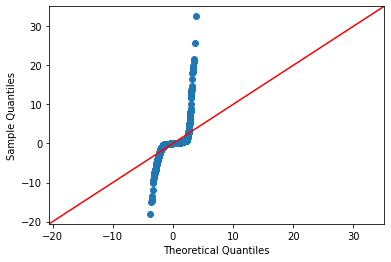

In [173]:
## Create a Q-QPlot

# first calculate residuals 
resid = y_test - y_hat_test

## then use sm's qqplot
fig, ax = plt.subplots(figsize=(6,4))
sm.graphics.qqplot(resid,line='45',fit=True,ax=ax);

### Residual Plot for Checking Homoscedasticity

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted Revenue')]

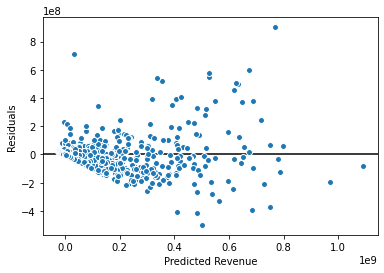

In [174]:
## Plot scatterplot with y_hat_test vs resids
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(y_hat_test, resid, ec='white')
ax.axhline(0,c='black',zorder=0)
ax.set(ylabel='Residuals',xlabel='Predicted Revenue')

### Putting it all together

In [175]:
def evaluate_ols(result,X_train_df, y_train, show_summary=True):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    try:
        display(result.summary())
    except:
        pass
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     3972.
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        17:22:48   Log-Likelihood:            -8.4213e+05
No. Observations:               45097   AIC:                         1.684e+06
Df Residuals:                   45061   BIC:                         1.685e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
adult                  1.371e+06   3.64e+06      0.376      0.707   -5.77e+06    8.51e+06
budget                    1.5448      0.014    110.732      0.000       1.517       1.572
popularity             1.419e+05   4441.421     31.954      0.000    1.33e+05    1.51e+05
runtime               -6249.4768   5192.945     -1.203      0.229   -1.64e+04    3928.782
vote_average          -4.954e+05   6.07e+04     -8.155      0.000   -6.14e+05   -3.76e+05
vote_count             2.895e+04    198.629    145.762      0.000    2.86e+04    2.93e+04
year                    2.57e+04   2.64e+04      0.972      0.331   -2.61e+04    7.75e+04
month                 -8.267e+04    4.2e+04     -1.968      0.049   -1.65e+05    -335.885
day                   -1.436e+04   1.62e+04     -0.886      0.376   -4.61e+04    1.74e+04
certification_G       -5.295e+06   6.82e+06     -0.776      0.438   -1.87e+07    8.08e+06
certification_MISSING -2.089e+06    6.7e+06     -0.312      0.755   -1.52e+07     1.1e+07
certification_NC-17   -6.958e+06   7.13e+06     -0.976      0.329   -2.09e+07    7.01e+06
certification_NR       -3.31e+06   6.72e+06     -0.492      0.622   -1.65e+07    9.87e+06
certification_PG      -1.681e+06    6.7e+06     -0.251      0.802   -1.48e+07    1.15e+07
certification_PG-13   -1.082e+07   6.67e+06     -1.623      0.105   -2.39e+07    2.25e+06
certification_R       -1.659e+07   6.64e+06     -2.500      0.012   -2.96e+07   -3.58e+06
belongs_to_collection  1.158e+07   6.56e+05     17.642      0.000    1.03e+07    1.29e+07
Genre_Family           -1.38e+06   7.42e+05     -1.859      0.063   -2.83e+06    7.49e+04
Genre_Animation        4.821e+05    9.2e+05      0.524      0.600   -1.32e+06    2.29e+06
Genre_Science Fiction -5.211e+06   6.74e+05     -7.730      0.000   -6.53e+06   -3.89e+06
Genre_Thriller        -1.327e+06   4.29e+05     -3.095      0.002   -2.17e+06   -4.86e+05
Genre_Mystery         -2.097e+06   6.88e+05     -3.046      0.002   -3.45e+06   -7.48e+05
Genre_Drama           -3.558e+05   3.37e+05     -1.054      0.292   -1.02e+06    3.06e+05
Genre_Romance           2.86e+04   4.59e+05      0.062      0.950   -8.72e+05    9.29e+05
Genre_Comedy          -3.946e+05   3.62e+05     -1.091      0.275    -1.1e+06    3.14e+05
Genre_War             -1.922e+06   1.23e+06     -1.559      0.119   -4.34e+06    4.95e+05
Genre_Crime           -2.812e+06   5.87e+05     -4.792      0.000   -3.96e+06   -1.66e+06
Genre_Action          -1.452e+06   5.04e+05     -2.880      0.004   -2.44e+06   -4.64e+05
Genre_Adventure        2.352e+06   7.41e+05      3.174      0.002       9e+05    3.81e+06
Genre_Horror          -5.668e+04   4.57e+05     -0.124      0.901   -9.53e+05     8.4e+05
Genre_Fantasy         -1.223e+06   7.42e+05     -1.648      0.099   -2.68e+06    2.31e+05
Genre_History         -

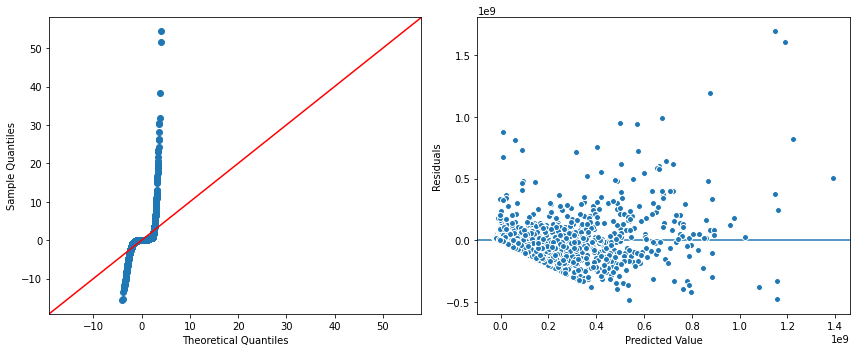

In [176]:
evaluate_ols(result,X_train_df, y_train)

# Improving Our Model:

> "Garbage In = Garbage Out"


- Before we dive into iterating on our model, I realized there were some big issues that I did not account for in the original data. 
    - some movies may not have been released. 
    - We should probably remove movies with 0 budget and revenue.
    

In [177]:
## reload the data
df = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz',lineterminator='\n')
df.head(2)

imdb_id  adult                     backdrop_path belongs_to_collection  \
0  tt0312305   0.00                               NaN                   NaN   
1  tt0326965   0.00  /xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg                   NaN   

   budget                                             genres  \
0    0.00  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...   
1    0.00  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...   

                     homepage       id original_language  \
0  http://www.qqthemovie.com/ 23738.00                en   
1    http://www.inmysleep.com 40048.00                en   

                           original_title  \
0  Quantum Quest: A Cassini Space Odyssey   
1                             In My Sleep   

                                            overview  popularity  \
0  Dave, a young photon, who is forced out of the...        2.77   
1  Marcus (Philip WInchester) wakes up in the mid...        6.12   

                        poster_path production_companies  \
0  /wflqNWF3BCwWJABjIbGWeM9hKHP.jpg                   []   
1  /sv9o6VYUQM2AbfmlTwDTn9238R5.jpg                   []   

                                production_countries release_date  revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2012-12-02     0.00   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   2010-04-23     0.00   

   runtime                                   spoken_languages    status  \
0    45.00  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   
1    90.00  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   

                      tagline                                   title  video  \
0                         NaN  Quantum Quest: A Cassini Space Odyssey   0.00   
1  Sleepwalking Can Be Deadly                             In My Sleep   0.00   

   vote_average  vote_count certification  
0          8.40        7.00           NaN  
1          5.50       31.00         PG-13

### Repeating Feature Engineering

In [178]:
## Columns to exclude - Keeping Status and companies
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','tagline','id','homepage', #'status','production_companies'
                 'production_countries','video','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)

## Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()

## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

## Use ourn function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')

## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()

## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex=False)    


## Drop original genre cols
df = df.drop(columns=['genres','genres_list'])


#### Fixing Certification
## Checking Certification values
df['certification'].value_counts(dropna=False)
# fix extra space certs
df['certification'] = df['certification'].str.strip()

## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)


#### Converting year to sep features
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)

## drop original feature
df = df.drop(columns=['release_date'])
df

imdb_id  adult  belongs_to_collection       budget  popularity  \
0      tt0312305   0.00                  False         0.00        2.77   
1      tt0326965   0.00                  False         0.00        6.12   
2      tt0331312   0.00                  False         0.00        0.60   
3      tt0393049   0.00                  False    300000.00        2.42   
4      tt0398286   0.00                  False 260000000.00      119.17   
...          ...    ...                    ...          ...         ...   
60125  tt7661128   0.00                  False         0.00        0.60   
60126  tt7786614   0.00                  False         0.00        0.60   
60127  tt8170758   0.00                  False         0.00        0.60   
60128  tt9330112   0.00                  False         0.00        1.20   
60129  tt9556198   0.00                   True         0.00        0.84   

                                    production_companies      revenue  \
0                                                     []         0.00   
1                                                     []         0.00   
2                                                     []         0.00   
3      [{'id': 46102, 'logo_path': None, 'name': 'Ill...         0.00   
4      [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil... 592461732.00   
...                                                  ...          ...   
60125  [{'id': 117146, 'logo_path': None, 'name': 'JE...    250000.00   
60126                                                 []         0.00   
60127                                                 []         0.00   
60128                                                 []         0.00   
60129  [{'id': 64599, 'logo_path': None, 'name': 'SRS...         0.00   

       runtime    status                                   title  \
0        45.00  Released  Quantum Quest: A Cassini Space Odyssey   
1        90.00  Released                             In My Sleep   
2         0.00  Released                      This Wretched Life   
3        98.00  Released                        Anderson's Cross   
4       100.00  Released                                 Tangled   
...        ...       ...                                     ...   
60125    77.00  Released                          Cold by Nature   
60126   100.00  Released                                  Tattoo   
60127    61.00  Released         The Swell Season: One Step Away   
60128   145.00  Released                      Ninaithale Inikkum   
60129    80.00  Released                  Deep Sea Monster Raiga   

       vote_average  vote_count certification  Genre_Family  Genre_Animation  \
0              8.40        7.00           NaN          True             True   
1              5.50       31.00         PG-13         False            False   
2              5.00        1.00           NaN         False            False   
3              4.00        5.00           NaN         False            False   
4              7.60     9364.00            PG          True             True   
...             ...         ...           ...           ...              ...   
60125          0.00        0.00         PG-13         False            False   
60126          5.00        1.00           NaN         False            False   
60127          0.00        0.00            NR         False            False   
60128          4.00        1.00           NaN         False            False   
60129          7.70        3.00           NaN         False            False   

       Genre_Science Fiction  Genre_Thriller  Genre_Mystery  Genre_Drama  \
0                       True           False          False        False   
1                      False            True           True         True   
2                      False           False          False        False   
3                      False           False          False         True   
4                      False           False          False        False 

### Filtering

- Make sure to only keep:
    1. Status=Released.
    2. Budget >0
    3. Revenue >0

In [179]:
## Check status
df['status'].value_counts()

Released           60097
Post Production       27
In Production          6
Name: status, dtype: int64

In [180]:
## Save only Released status
df = df.loc[ df['status'] == 'Released']
df = df.drop(columns=['status'])
df

imdb_id  adult  belongs_to_collection       budget  popularity  \
0      tt0312305   0.00                  False         0.00        2.77   
1      tt0326965   0.00                  False         0.00        6.12   
2      tt0331312   0.00                  False         0.00        0.60   
3      tt0393049   0.00                  False    300000.00        2.42   
4      tt0398286   0.00                  False 260000000.00      119.17   
...          ...    ...                    ...          ...         ...   
60125  tt7661128   0.00                  False         0.00        0.60   
60126  tt7786614   0.00                  False         0.00        0.60   
60127  tt8170758   0.00                  False         0.00        0.60   
60128  tt9330112   0.00                  False         0.00        1.20   
60129  tt9556198   0.00                   True         0.00        0.84   

                                    production_companies      revenue  \
0                                                     []         0.00   
1                                                     []         0.00   
2                                                     []         0.00   
3      [{'id': 46102, 'logo_path': None, 'name': 'Ill...         0.00   
4      [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil... 592461732.00   
...                                                  ...          ...   
60125  [{'id': 117146, 'logo_path': None, 'name': 'JE...    250000.00   
60126                                                 []         0.00   
60127                                                 []         0.00   
60128                                                 []         0.00   
60129  [{'id': 64599, 'logo_path': None, 'name': 'SRS...         0.00   

       runtime                                   title  vote_average  \
0        45.00  Quantum Quest: A Cassini Space Odyssey          8.40   
1        90.00                             In My Sleep          5.50   
2         0.00                      This Wretched Life          5.00   
3        98.00                        Anderson's Cross          4.00   
4       100.00                                 Tangled          7.60   
...        ...                                     ...           ...   
60125    77.00                          Cold by Nature          0.00   
60126   100.00                                  Tattoo          5.00   
60127    61.00         The Swell Season: One Step Away          0.00   
60128   145.00                      Ninaithale Inikkum          4.00   
60129    80.00                  Deep Sea Monster Raiga          7.70   

       vote_count certification  Genre_Family  Genre_Animation  \
0            7.00           NaN          True             True   
1           31.00         PG-13         False            False   
2            1.00           NaN         False            False   
3            5.00           NaN         False            False   
4         9364.00            PG          True             True   
...           ...           ...           ...              ...   
60125        0.00         PG-13         False            False   
60126        1.00           NaN         False            False   
60127        0.00            NR         False            False   
60128        1.00           NaN         False            False   
60129        3.00           NaN         False            False   

       Genre_Science Fiction  Genre_Thriller  Genre_Mystery  Genre_Drama  \
0                       True           False          False        False   
1                      False            True           True         True   
2                      False           False          False        False   
3                      False           False          False         True   
4                      False           False          False        False   
...                      ...             ...            ...          ...   
60125                  False            T

In [181]:
## filter out financials that don't have financial data
df = df.loc[(df['budget'] >0 ) & (df['revenue']>0)]
df

imdb_id  adult  belongs_to_collection       budget  popularity  \
4      tt0398286   0.00                  False 260000000.00      119.17   
6      tt0411951   0.00                   True  30000000.00       70.69   
9      tt0427152   0.00                  False  69000000.00       21.75   
10     tt0429493   0.00                  False 110000000.00       56.49   
11     tt0435761   0.00                   True 200000000.00       93.98   
...          ...    ...                    ...          ...         ...   
59859  tt1532382   0.00                   True   3500000.00        4.84   
59887  tt1542960   0.00                  False    300000.00        1.94   
59923  tt1560950   0.00                   True       600.00        1.79   
59929  tt1565058   0.00                   True    125000.00        5.99   
59937  tt1569364   0.00                  False  10000000.00        6.69   

                                    production_companies       revenue  \
4      [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...  592461732.00   
6      [{'id': 5882, 'logo_path': None, 'name': 'Namc...     967000.00   
9      [{'id': 2242, 'logo_path': None, 'name': 'Ever...   86387857.00   
10     [{'id': 10908, 'logo_path': None, 'name': 'Pho...  177238796.00   
11     [{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH... 1066969703.00   
...                                                  ...           ...   
59859                                                 []    3704408.00   
59887  [{'id': 46722, 'logo_path': None, 'name': 'Gol...     200000.00   
59923                                                 []          3.00   
59929  [{'id': 4580, 'logo_path': None, 'name': 'Cine...    3470000.00   
59937  [{'id': 1038, 'logo_path': '/o62j8ZNXmRTrq6Thv...   21500000.00   

       runtime                     title  vote_average  vote_count  \
4       100.00                   Tangled          7.60     9364.00   
6        92.00                    Tekken          5.40      553.00   
9       114.00       Dinner for Schmucks          5.60     1452.00   
10      117.00                The A-Team          6.40     3877.00   
11      103.00               Toy Story 3          7.80    12455.00   
...        ...                       ...           ...         ...   
59859    97.00        Hooked on the Game          6.30       42.00   
59887   122.00  The Figurine (Araromire)          4.20       11.00   
59923    81.00                   D@bbe 2          1.90       10.00   
59929    88.00            A Blood Pledge          5.40       40.00   
59937   102.00           Black Lightning          6.10      135.00   

      certification  Genre_Family  Genre_Animation  Genre_Science Fiction  \
4                PG          True             True                  False   
6                 R         False            False                   True   
9             PG-13         False            False                  False   
10            PG-13         False            False                  False   
11                G          True             True                  False   
...             ...           ...              ...                    ...   
59859           NaN         False            False                   True   
59887           NaN         False            False                  False   
59923           NaN         False            False                  False   
59929           NaN         False            False                  False   
59937            NR         False            False                  False   

       Genre_Thriller  Genre_Mystery  Genre_Drama  Genre_Romance  \
4               False          False        False          False   
6                True          False         True          False   
9               False          False        False          False   
10               True          False        False          False   
11              False          False        False          False   
...               ...            ...         

### Production Company

In [182]:
df['production_companies']

4        [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...
6        [{'id': 5882, 'logo_path': None, 'name': 'Namc...
9        [{'id': 2242, 'logo_path': None, 'name': 'Ever...
10       [{'id': 10908, 'logo_path': None, 'name': 'Pho...
11       [{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...
                               ...                        
59859                                                   []
59887    [{'id': 46722, 'logo_path': None, 'name': 'Gol...
59923                                                   []
59929    [{'id': 4580, 'logo_path': None, 'name': 'Cine...
59937    [{'id': 1038, 'logo_path': '/o62j8ZNXmRTrq6Thv...
Name: production_companies, Length: 5090, dtype: object

In [183]:
## Test case
test = df.iloc[-1]['production_companies']
test

"[{'id': 1038, 'logo_path': '/o62j8ZNXmRTrq6ThviFWiL9zb8J.png', 'name': 'Bazelevs Production', 'origin_country': 'RU'}]"

In [184]:
## getting longest string to check for multiple companies
idxmax = df['production_companies'].apply(len).idxmax()
idxmax

44234

In [185]:
test = df.loc[idxmax, 'production_companies']
test

"[{'id': 53671, 'logo_path': None, 'name': 'Lantia Cinema & Audiovisivi', 'origin_country': ''}, {'id': 8, 'logo_path': '/78ilmDNTpdCfsakrsLqmAUkFTrO.png', 'name': 'Fine Line Features', 'origin_country': ''}, {'id': 76, 'logo_path': '/nebkQYtQKhZyHJfh5v0oGpNbPzu.png', 'name': 'Zentropa Entertainments', 'origin_country': 'DK'}, {'id': 119, 'logo_path': '/1di2gITGUZr730AMuMKiCrP90Vl.png', 'name': 'DR', 'origin_country': 'DK'}, {'id': 157, 'logo_path': None, 'name': 'SVT Drama', 'origin_country': ''}, {'id': 201, 'logo_path': '/6UIpEURdjnmcJPwgTDRzVRuwADr.png', 'name': 'ARTE', 'origin_country': 'FR'}, {'id': 321, 'logo_path': '/pfp6VWF3tYfOHHVRHpYe2iGcYrf.png', 'name': 'Memfis Film', 'origin_country': 'SE'}, {'id': 591, 'logo_path': '/q5I5RDwMEiqoNmfaJgd2LraEOJY.png', 'name': 'France 3 Cinéma', 'origin_country': 'FR'}, {'id': 2996, 'logo_path': None, 'name': 'Angel films', 'origin_country': ''}, {'id': 5975, 'logo_path': '/vvjgoKygWWYZvYyidT3RmOCq5If.png', 'name': 'YLE', 'origin_country':

In [186]:
# using regular expressions to extrap just the name
import re
exp= r"\'name\'\:.?\'(\w*.*?)\'"
re.findall(exp, test)
# df['production_companies'].str.extractall(exp,expand=False)

['Lantia Cinema & Audiovisivi',
 'Fine Line Features',
 'Zentropa Entertainments',
 'DR',
 'SVT Drama',
 'ARTE',
 'Memfis Film',
 'France 3 Cinéma',
 'Angel films',
 'YLE',
 'Blind Spot Pictures',
 'VPRO',
 'Liberator Productions',
 'Íslenska kvikmyndasamsteypan',
 'Pain Unlimited GmbH Filmproduktion',
 'Trust Film Svenska',
 'Cinematograph A/S',
 'What Else? B.V',
 'Filmek A/S',
 'Film4 Productions',
 'Canal+',
 'ARTE France Cinéma',
 'Film i Väst',
 'TV 1000 Sverige',
 'WDR',
 'Constantin Film']

In [187]:
def get_prod_company_names(x):
    if x=='[]':
        return ["MISSING"]
    
    exp= r"\'name\'\:.?\'(\w*.*?)\'"
    companies = re.findall(exp, x)
    return companies
#     return ','.join(companies)


In [188]:
# df[df['prod_company'] =='']
get_prod_company_names(test)

['Lantia Cinema & Audiovisivi',
 'Fine Line Features',
 'Zentropa Entertainments',
 'DR',
 'SVT Drama',
 'ARTE',
 'Memfis Film',
 'France 3 Cinéma',
 'Angel films',
 'YLE',
 'Blind Spot Pictures',
 'VPRO',
 'Liberator Productions',
 'Íslenska kvikmyndasamsteypan',
 'Pain Unlimited GmbH Filmproduktion',
 'Trust Film Svenska',
 'Cinematograph A/S',
 'What Else? B.V',
 'Filmek A/S',
 'Film4 Productions',
 'Canal+',
 'ARTE France Cinéma',
 'Film i Väst',
 'TV 1000 Sverige',
 'WDR',
 'Constantin Film']

In [189]:
## Save new clean prod_comapny col and explode
df['prod_company'] = df['production_companies'].apply(get_prod_company_names)
prod_companies = df['prod_company'].explode()#.nunique()

/var/folders/7r/wd0l_4dd19d8nf97v9_7f9340000gn/T/ipykernel_206/3339258235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prod_company'] = df['production_companies'].apply(get_prod_company_names)


In [190]:
prod_companies.value_counts().head(50)

Universal Pictures           285
Warner Bros. Pictures        281
Columbia Pictures            234
20th Century Fox             195
Paramount                    178
MISSING                      167
Canal+                       152
New Line Cinema              143
Walt Disney Pictures         135
Relativity Media             123
Lionsgate                    121
DreamWorks Pictures           99
Metro-Goldwyn-Mayer           98
StudioCanal                   96
Village Roadshow Pictures     91
Touchstone Pictures           76
Miramax                       74
Summit Entertainment          72
Dune Entertainment            72
Screen Gems                   69
TSG Entertainment             67
Focus Features                66
Fox Searchlight Pictures      64
Sony Pictures                 62
Regency Enterprises           62
Working Title Films           56
Blumhouse Productions         55
Dimension Films               55
Legendary Pictures            51
The Weinstein Company         50
Millennium

- Common Prod Company Encoding:
    - Keep top 50 most common companies an one hot encode

In [191]:
common_companies = sorted(prod_companies.value_counts().head(50).index)
common_companies

['20th Century Fox',
 'BBC Films',
 'Blumhouse Productions',
 'CJ Entertainment',
 'Canal+',
 'Ciné+',
 'Columbia Pictures',
 'Dimension Films',
 'DreamWorks Animation',
 'DreamWorks Pictures',
 'Dune Entertainment',
 'Epsilon Motion Pictures',
 'EuropaCorp',
 'Film4 Productions',
 'Focus Features',
 'Fox 2000 Pictures',
 'Fox Searchlight Pictures',
 'France 2 Cinéma',
 'France 3 Cinéma',
 'Ingenious Media',
 'Legendary Pictures',
 'Lionsgate',
 'MISSING',
 'Metro-Goldwyn-Mayer',
 'Millennium Films',
 'Miramax',
 'New Line Cinema',
 'New Regency Pictures',
 'Original Film',
 'Paramount',
 'Participant',
 'Regency Enterprises',
 'Relativity Media',
 'Revolution Studios',
 'Scott Free Productions',
 'Scott Rudin Productions',
 'Screen Gems',
 'Sony Pictures',
 'Spyglass Entertainment',
 'StudioCanal',
 'Summit Entertainment',
 'TF1 Films Production',
 'TSG Entertainment',
 'The Weinstein Company',
 'Touchstone Pictures',
 'Universal Pictures',
 'Village Roadshow Pictures',
 'Walt Disney 

In [192]:
len(common_companies)

50

In [193]:
## manually ohe top 50 companies
for company in common_companies:
    df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)


/var/folders/7r/wd0l_4dd19d8nf97v9_7f9340000gn/T/ipykernel_206/315294604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)
/var/folders/7r/wd0l_4dd19d8nf97v9_7f9340000gn/T/ipykernel_206/315294604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)
/var/folders/7r/wd0l_4dd19d8nf97v9_7f9340000gn/T/ipykernel_206/315294604.py:3: Set

/var/folders/7r/wd0l_4dd19d8nf97v9_7f9340000gn/T/ipykernel_206/315294604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)
/var/folders/7r/wd0l_4dd19d8nf97v9_7f9340000gn/T/ipykernel_206/315294604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)
/var/folders/7r/wd0l_4dd19d8nf97v9_7f9340000gn/T/ipykernel_206/315294604.py:3: Set

In [194]:
df.head()

imdb_id  adult  belongs_to_collection       budget  popularity  \
4   tt0398286   0.00                  False 260000000.00      119.17   
6   tt0411951   0.00                   True  30000000.00       70.69   
9   tt0427152   0.00                  False  69000000.00       21.75   
10  tt0429493   0.00                  False 110000000.00       56.49   
11  tt0435761   0.00                   True 200000000.00       93.98   

                                 production_companies       revenue  runtime  \
4   [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...  592461732.00   100.00   
6   [{'id': 5882, 'logo_path': None, 'name': 'Namc...     967000.00    92.00   
9   [{'id': 2242, 'logo_path': None, 'name': 'Ever...   86387857.00   114.00   
10  [{'id': 10908, 'logo_path': None, 'name': 'Pho...  177238796.00   117.00   
11  [{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH... 1066969703.00   103.00   

                  title  vote_average  vote_count certification  Genre_Family  \
4               Tangled          7.60     9364.00            PG          True   
6                Tekken          5.40      553.00             R         False   
9   Dinner for Schmucks          5.60     1452.00         PG-13         False   
10           The A-Team          6.40     3877.00         PG-13         False   
11          Toy Story 3          7.80    12455.00             G          True   

    Genre_Animation  Genre_Science Fiction  Genre_Thriller  Genre_Mystery  \
4              True                  False           False          False   
6             False                   True            True          False   
9             False                  False           False          False   
10            False                  False            True          False   
11             True                  False           False          False   

    Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  \
4         False          False         False      False        False   
6          True          False         False      False         True   
9         False          False          True      False        False   
10        False          False          True      False         True   
11        False          False          True      False        False   

    Genre_Action  Genre_Adventure  Genre_Horror  Genre_Fantasy  Genre_History  \
4          False            False         False          False          False   
6           True            False         False          False          False   
9          False            False         False          False          False   
10          True             True         False          False          False   
11         False            False         False          False          False   

    Genre_Western  Genre_Music  Genre_Documentary  Genre_TV Movie    year  \
4           False        False              False           False 2010.00   
6           False        False              False           False 2010.00   
9           False        False              False           False 2010.00   
10          False        False              False           False 2010.00   
11          False        False              False           False 2010.00   

    month   day                                       prod_company  \
4   11.00 24.00  [Walt Disney Animation Studios, Walt Disney Pi...   
6    3.00 20.00                          [Namco, Light Song Films]   
9    7.00 30.00  [Everyman Pictures, Paramount, Spyglass Entert...   
10   6.00  9.00  [Phoenix Film Partners, Dune Entertainment, St...   
11   6.00 16.00                      [Pixar, Walt Disney Pictures]   

    ProdComp_20th Century Fox  ProdComp_BBC Films  \
4                       False               False   
6                       False               False   
9                       False               False   
10                       True               False   
11                      False               False   

    ProdComp_Blumho

In [195]:
drop_for_model = ['title','imdb_id','prod_company','production_companies']
df = df.drop(columns=drop_for_model)
df

adult  belongs_to_collection       budget  popularity       revenue  \
4       0.00                  False 260000000.00      119.17  592461732.00   
6       0.00                   True  30000000.00       70.69     967000.00   
9       0.00                  False  69000000.00       21.75   86387857.00   
10      0.00                  False 110000000.00       56.49  177238796.00   
11      0.00                   True 200000000.00       93.98 1066969703.00   
...      ...                    ...          ...         ...           ...   
59859   0.00                   True   3500000.00        4.84    3704408.00   
59887   0.00                  False    300000.00        1.94     200000.00   
59923   0.00                   True       600.00        1.79          3.00   
59929   0.00                   True    125000.00        5.99    3470000.00   
59937   0.00                  False  10000000.00        6.69   21500000.00   

       runtime  vote_average  vote_count certification  Genre_Family  \
4       100.00          7.60     9364.00            PG          True   
6        92.00          5.40      553.00             R         False   
9       114.00          5.60     1452.00         PG-13         False   
10      117.00          6.40     3877.00         PG-13         False   
11      103.00          7.80    12455.00             G          True   
...        ...           ...         ...           ...           ...   
59859    97.00          6.30       42.00           NaN         False   
59887   122.00          4.20       11.00           NaN         False   
59923    81.00          1.90       10.00           NaN         False   
59929    88.00          5.40       40.00           NaN         False   
59937   102.00          6.10      135.00            NR         False   

       Genre_Animation  Genre_Science Fiction  Genre_Thriller  Genre_Mystery  \
4                 True                  False           False          False   
6                False                   True            True          False   
9                False                  False           False          False   
10               False                  False            True          False   
11                True                  False           False          False   
...                ...                    ...             ...            ...   
59859            False                   True           False          False   
59887            False                  False           False           True   
59923            False                  False           False           True   
59929            False                  False           False          False   
59937            False                  False           False          False   

       Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  \
4            False          False         False      False        False   
6             True          False         False      False         True   
9            False          False          True      False        False   
10           False          False          True      False         True   
11           False          False          True      False        False   
...            ...            ...           ...        ...          ...   
59859        False          False         False      False        False   
59887         True          False         False      False        False   
59923        False          False         False      False        False   
59929        False          False         False      False        False   
59937        False          False         False      False        False   

       Genre_Action  Genre_Adventure  Genre_Horror  Genre_Fantasy  \
4             False            False         False          False   
6              True            False         False          False   
9             False            False         False          False   
10             True             True         False          False  

# Checking for Linearity

In [196]:
## concatenating training data into plot_df
plot_df = pd.concat([X_train_df,y_train],axis=1)
plot_df

adult    budget  popularity  runtime  vote_average  vote_count    year  \
9538    0.00      0.00        1.11    80.00          5.30        5.00 2013.00   
16553   0.00      0.00        1.88    92.00          6.00        2.00 2015.00   
34106   0.00      0.00        1.50   101.00          2.00        1.00 2020.00   
3804    0.00      0.00        1.51   100.00          7.70        3.00 2011.00   
37747   0.00 300000.00        0.60   138.00          5.00        2.00 2020.00   
...      ...       ...         ...      ...           ...         ...     ...   
5929    0.00      0.00        1.40    95.00          5.00        4.00 2012.00   
43807   0.00 100000.00        1.66    82.00          4.80        4.00 2021.00   
4220    0.00      0.00        0.84    92.00          0.00        0.00 2011.00   
6682    0.00      0.00        3.98   113.00          6.00       18.00 2012.00   
31732   0.00      0.00        3.06   159.00          6.50        8.00 2018.00   

       month   day  certification_G  certification_MISSING  \
9538   10.00  1.00             0.00                   1.00   
16553   4.00 15.00             0.00                   1.00   
34106  11.00  4.00             0.00                   0.00   
3804    9.00 24.00             0.00                   0.00   
37747   9.00 18.00             0.00                   1.00   
...      ...   ...              ...                    ...   
5929   10.00  4.00             0.00                   1.00   
43807   2.00 12.00             0.00                   1.00   
4220   10.00  7.00             0.00                   1.00   
6682    6.00 11.00             0.00                   0.00   
31732  11.00 29.00             0.00                   1.00   

       certification_NC-17  certification_NR  certification_PG  \
9538                  0.00              0.00              0.00   
16553                 0.00              0.00              0.00   
34106                 0.00              0.00              0.00   
3804                  0.00              0.00              1.00   
37747                 0.00              0.00              0.00   
...                    ...               ...               ...   
5929                  0.00              0.00              0.00   
43807                 0.00              0.00              0.00   
4220                  0.00              0.00              0.00   
6682                  0.00              1.00              0.00   
31732                 0.00              0.00              0.00   

       certification_PG-13  certification_R  belongs_to_collection  \
9538                  0.00             0.00                   0.00   
16553                 0.00             0.00                   0.00   
34106                 0.00             1.00                   0.00   
3804                  0.00             0.00                   0.00   
37747                 0.00             0.00                   0.00   
...                    ...              ...                    ...   
5929                  0.00             0.00                   0.00   
43807                 0.00             0.00                   0.00   
4220                  0.00             0.00                   0.00   
6682                  0.00             0.00                   1.00   
31732                 0.00             0.00                   0.00   

       Genre_Family  Genre_Animation  Genre_Science Fiction  Genre_Thriller  \
9538           1.00             0.00                   0.00            0.00   
16553          0.00             0.00                   0.00            0.00   
34106          0.00             0.00                   0.00            0.00   
3804           0.00             0.00                   1.00            0.00   
37747          0.00             0.00                   0.00            0.00   
...             ...              ...                    ...             ...   
5929           0.00             0.00                   0.00            1.00   
43807          0.00    

In [197]:
## looking at columns for model to evaluate linearity
## save plot_cols to a list to show 
## (dropping genre columns from plot_df for pair_plot)
genre_cols = [c for c in df.columns if c.startswith('Genre')]
plot_cols = plot_df.drop(columns=['revenue',*genre_cols]).columns
len(plot_cols)

18

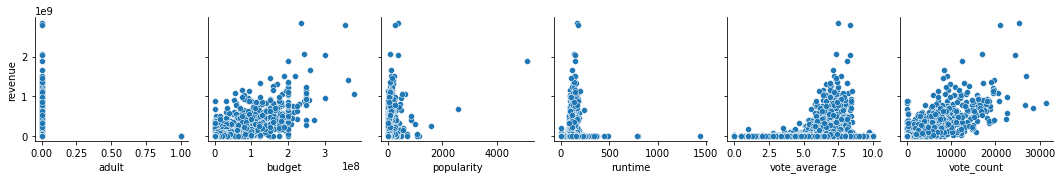

In [198]:
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[:6])

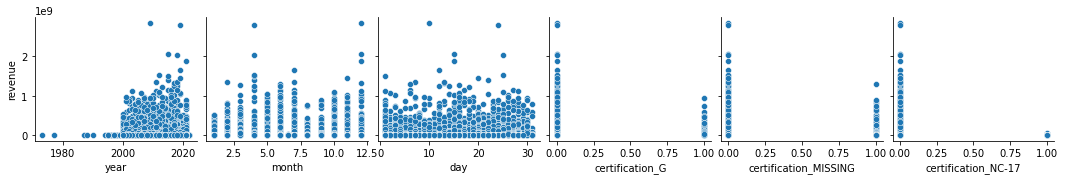

In [199]:
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[6:12])

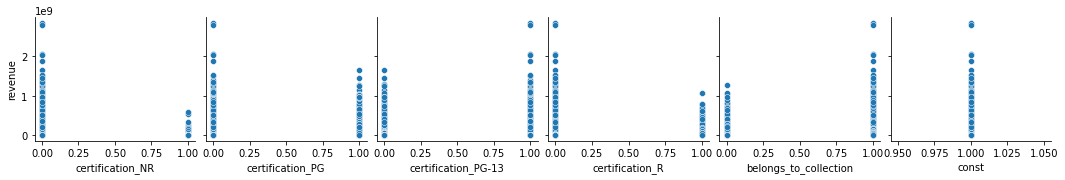

In [200]:
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[12:])

- Shouldn't have years before 2000, so drop. 
- Check outliers in popularity, runtime


In [201]:
# remove movies prior to 2000
df = df.loc[ df['year']>=2000]
df

adult  belongs_to_collection       budget  popularity       revenue  \
4       0.00                  False 260000000.00      119.17  592461732.00   
6       0.00                   True  30000000.00       70.69     967000.00   
9       0.00                  False  69000000.00       21.75   86387857.00   
10      0.00                  False 110000000.00       56.49  177238796.00   
11      0.00                   True 200000000.00       93.98 1066969703.00   
...      ...                    ...          ...         ...           ...   
59859   0.00                   True   3500000.00        4.84    3704408.00   
59887   0.00                  False    300000.00        1.94     200000.00   
59923   0.00                   True       600.00        1.79          3.00   
59929   0.00                   True    125000.00        5.99    3470000.00   
59937   0.00                  False  10000000.00        6.69   21500000.00   

       runtime  vote_average  vote_count certification  Genre_Family  \
4       100.00          7.60     9364.00            PG          True   
6        92.00          5.40      553.00             R         False   
9       114.00          5.60     1452.00         PG-13         False   
10      117.00          6.40     3877.00         PG-13         False   
11      103.00          7.80    12455.00             G          True   
...        ...           ...         ...           ...           ...   
59859    97.00          6.30       42.00           NaN         False   
59887   122.00          4.20       11.00           NaN         False   
59923    81.00          1.90       10.00           NaN         False   
59929    88.00          5.40       40.00           NaN         False   
59937   102.00          6.10      135.00            NR         False   

       Genre_Animation  Genre_Science Fiction  Genre_Thriller  Genre_Mystery  \
4                 True                  False           False          False   
6                False                   True            True          False   
9                False                  False           False          False   
10               False                  False            True          False   
11                True                  False           False          False   
...                ...                    ...             ...            ...   
59859            False                   True           False          False   
59887            False                  False           False           True   
59923            False                  False           False           True   
59929            False                  False           False          False   
59937            False                  False           False          False   

       Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  \
4            False          False         False      False        False   
6             True          False         False      False         True   
9            False          False          True      False        False   
10           False          False          True      False         True   
11           False          False          True      False        False   
...            ...            ...           ...        ...          ...   
59859        False          False         False      False        False   
59887         True          False         False      False        False   
59923        False          False         False      False        False   
59929        False          False         False      False        False   
59937        False          False         False      False        False   

       Genre_Action  Genre_Adventure  Genre_Horror  Genre_Fantasy  \
4             False            False         False          False   
6              True            False         False          False   
9             False            False         False          False   
10             True             True         False          False  

> Creating a function to perform train test split and turn train and test data into a dataframe.

In [202]:
def get_train_test_split(df_, y_col='revenue',drop_cols=[]):
    
    ## Make copy of input df
    df = df_.copy()
    
    ## filter columns in drop cols (if exist)
    final_drop_cols = []
    [df.drop(columns=c,inplace=True) for c in df.columns if c in drop_cols]
    
    
    ## Make x and y variables
    y = df[y_col].copy()
    X = df.drop(columns=[y_col]).copy()

    X_train, X_test, y_train, y_test = train_test_split(X,y)#, random_state=321)
    

    
    ## make cat selector and using it to save list of column names
    cat_select = make_column_selector(dtype_include='object')
    cat_cols = cat_select(X_train)


    ## make num selector and using it to save list of column names
    num_select = make_column_selector(dtype_include='number')
    num_cols = num_select(X_train)


    ## select manually OHE cols for later
    bool_select = make_column_selector(dtype_include='bool')
    already_ohe_cols = bool_select(X_train)

    ## convert manual ohe to int
    X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
    X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

    ## make pipelines
    cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                           fill_value='MISSING'),
                             OneHotEncoder(handle_unknown='ignore', sparse=False))
    num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                            )

    preprocessor = make_column_transformer((num_pipe, num_cols),
                                           (cat_pipe,cat_cols),remainder='passthrough')
    
    

    ## fit the col transformer
    preprocessor.fit(X_train)

    ## Finding the categorical pipeline in our col transformer.
    preprocessor.named_transformers_['pipeline-2']

    ## B) Using list-slicing to find the encoder 
    cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)


    ## Create the empty list
    final_features = [*cat_features,*num_cols,*already_ohe_cols]

    ## Make df verisons of x data
    X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                              columns=final_features, index=X_train.index)


    X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                             columns=final_features, index=X_test.index)


    ### Adding a Constant for Statsmodels
    ## Make final X_train_df and X_test_df with constants added
    X_train_df = sm.add_constant(X_train_tf, prepend=False, has_constant='add')
    X_test_df = sm.add_constant(X_test_tf, prepend=False, has_constant='add')
    return X_train_df, y_train, X_test_df, y_test


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     148.4
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        17:34:22   Log-Likelihood:                -75225.
No. Observations:                3810   AIC:                         1.506e+05
Df Residuals:                    3727   BIC:                         1.511e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_G                       53.6796     30.240      1.775      0.076      -5.610     112.969
certification_MISSING                  1.8708      0.059     31.916      0.000       1.756       1.986
certification_NC-17                 1.781e+04   2.96e+04      0.602      0.547   -4.02e+04    7.58e+04
certification_NR                    2.213e+05   8.63e+04      2.563      0.010     5.2e+04    3.91e+05
certification_PG                   -3.157e+06   1.48e+06     -2.140      0.032   -6.05e+06   -2.65e+05
certification_PG-13                 3.011e+04    696.263     43.250      0.000    2.87e+04    3.15e+04
certification_R                     5.072e+05   2.92e+05      1.737      0.082   -6.53e+04    1.08e+06
adult                              -6.134e+05   4.41e+05     -1.392      0.164   -1.48e+06    2.51e+05
budget                              2.054e+05   1.76e+05      1.166      0.244    -1.4e+05    5.51e+05
popularity                         -1.319e+08   7.37e+07     -1.789      0.074   -2.76e+08    1.26e+07
runtime                            -1.227e+08   7.41e+07     -1.657      0.098   -2.68e+08    2.25e+07
vote_average                       -1.361e+08    7.8e+07     -1.744      0.081   -2.89e+08    1.69e+07
vote_count                         -1.269e+08   7.42e+07     -1.711      0.087   -2.72e+08    1.85e+07
year                               -1.188e+08   7.36e+07     -1.614      0.107   -2.63e+08    2.55e+07
month                              -1.303e+08   7.35e+07     -1.773      0.076   -2.74e+08    1.38e+07
day                                 -1.46e+08   7.34e+07     -1.988      0.047    -2.9e+08      -2e+06
belongs_to_collection               5.057e+07   4.12e+06     12.285      0.000    4.25e+07    5.86e+07
Genre_Family                       -1.122e+07    7.7e+06     -1.458      0.145   -2.63e+07    3.87e+06
Genre_Animation                     1.986e+07   8.53e+06      2.328      0.020    3.13e+06    3.66e+07
Genre_Science Fiction              -3.584e+07   5.73e+06     -6.251      0.000   -4.71e+07   -2.46e+07
Genre_Thriller                     -2.118e+06   4.18e+06     -0.507      0.612   -1.03e+07    6.07e+06
Genre_Mystery                      -9.366e+06   5.79e+06     -1.616      0.106   -2.07e+07    1.99e+06
Genre_Drama                        -8.928e+05   3.94e+06     -0.226      0.821   -8.62e+06    6.84e+06
Genre_Romance                       6.613e+06   4.36e+06      1.518      0.129   -1.93e+06    1.52e+07
Genre_Comedy                        3.134e+06   3.91e+06      0.801      0.423   -4.54e+06    1.08e+07
Genre_War                           4.731e+06   8.71e+06      0.543      0.587   -1.23e+07    2.18e+07
Genre_Crime                        -4.764e+06   4.82e+06     -0.989      0.323   -1.42e+07    4.

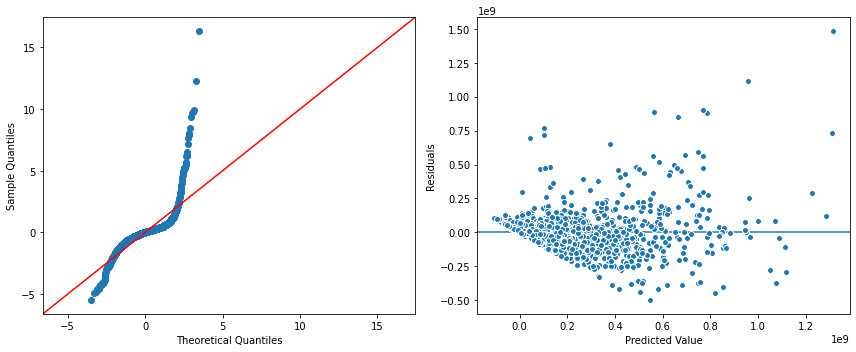

In [203]:
## Use our function to make new x,y vars
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df)

## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

## Removing Outliers

In [204]:
from scipy import stats
def find_outliers(data, verbose=True):
    outliers = np.abs(stats.zscore(data))>3
    
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using Z-Scores.")
    return outliers

In [205]:
## save a dictionary of the T/F outlier index for each feature in outleir_cols
outlier_cols = ['runtime','popularity','revenue']

outliers = {}
for col in outlier_cols:
    outliers_col = find_outliers(df[col])
    outliers[col] = outliers_col

- 0 outliers found in runtime using Z-Scores.
- 34 outliers found in popularity using Z-Scores.
- 128 outliers found in revenue using Z-Scores.


In [206]:
# Make new df_clean copy of df
df_clean = df.copy()

## loop through dictionary to remove outliers
for col, idx_outliers in outliers.items():
    df_clean = df_clean[~idx_outliers]
df_clean

/var/folders/7r/wd0l_4dd19d8nf97v9_7f9340000gn/T/ipykernel_206/1890287056.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[~idx_outliers]


adult  belongs_to_collection       budget  popularity      revenue  \
4       0.00                  False 260000000.00      119.17 592461732.00   
6       0.00                   True  30000000.00       70.69    967000.00   
9       0.00                  False  69000000.00       21.75  86387857.00   
10      0.00                  False 110000000.00       56.49 177238796.00   
14      0.00                  False  85000000.00       37.00  48000000.00   
...      ...                    ...          ...         ...          ...   
59859   0.00                   True   3500000.00        4.84   3704408.00   
59887   0.00                  False    300000.00        1.94    200000.00   
59923   0.00                   True       600.00        1.79         3.00   
59929   0.00                   True    125000.00        5.99   3470000.00   
59937   0.00                  False  10000000.00        6.69  21500000.00   

       runtime  vote_average  vote_count certification  Genre_Family  \
4       100.00          7.60     9364.00            PG          True   
6        92.00          5.40      553.00             R         False   
9       114.00          5.60     1452.00         PG-13         False   
10      117.00          6.40     3877.00         PG-13         False   
14      112.00          7.50     6331.00         PG-13         False   
...        ...           ...         ...           ...           ...   
59859    97.00          6.30       42.00           NaN         False   
59887   122.00          4.20       11.00           NaN         False   
59923    81.00          1.90       10.00           NaN         False   
59929    88.00          5.40       40.00           NaN         False   
59937   102.00          6.10      135.00            NR         False   

       Genre_Animation  Genre_Science Fiction  Genre_Thriller  Genre_Mystery  \
4                 True                  False           False          False   
6                False                   True            True          False   
9                False                  False           False          False   
10               False                  False            True          False   
14               False                  False           False          False   
...                ...                    ...             ...            ...   
59859            False                   True           False          False   
59887            False                  False           False           True   
59923            False                  False           False           True   
59929            False                  False           False          False   
59937            False                  False           False          False   

       Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  \
4            False          False         False      False        False   
6             True          False         False      False         True   
9            False          False          True      False        False   
10           False          False          True      False         True   
14           False           True          True      False        False   
...            ...            ...           ...        ...          ...   
59859        False          False         False      False        False   
59887         True          False         False      False        False   
59923        False          False         False      False        False   
59929        False          False         False      False        False   
59937        False          False         False      False        False   

       Genre_Action  Genre_Adventure  Genre_Horror  Genre_Fantasy  \
4             False            False         False          False   
6              True            False         False          False   
9             False            False         False          False   
10             True             True         False          False   
14        

### Model 3: Outliers Removed (Z_scores)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     134.7
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        17:37:18   Log-Likelihood:                -70971.
No. Observations:                3696   AIC:                         1.421e+05
Df Residuals:                    3612   BIC:                         1.426e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_G                     2.548e+06   5.36e+07      0.048      0.962   -1.03e+08    1.08e+08
certification_MISSING                  1.2115      0.039     31.196      0.000       1.135       1.288
certification_NC-17                 2.016e+05   3.69e+04      5.469      0.000    1.29e+05    2.74e+05
certification_NR                    1.762e+05      5e+04      3.527      0.000    7.83e+04    2.74e+05
certification_PG                   -1.212e+06   8.89e+05     -1.363      0.173   -2.95e+06    5.31e+05
certification_PG-13                 2.051e+04    494.760     41.448      0.000    1.95e+04    2.15e+04
certification_R                    -1.139e+05   1.73e+05     -0.657      0.511   -4.54e+05    2.26e+05
adult                              -2.068e+05   2.61e+05     -0.792      0.428   -7.19e+05    3.05e+05
budget                             -1.177e+05   1.04e+05     -1.133      0.257   -3.21e+05     8.6e+04
popularity                          3.726e+07   4.38e+07      0.850      0.395   -4.87e+07    1.23e+08
runtime                             2.821e+07    4.4e+07      0.641      0.522   -5.81e+07    1.14e+08
vote_average                        1.669e+07   4.62e+07      0.362      0.718   -7.38e+07    1.07e+08
vote_count                          3.085e+07    4.4e+07      0.701      0.484   -5.55e+07    1.17e+08
year                                3.766e+07   4.37e+07      0.861      0.389   -4.81e+07    1.23e+08
month                               2.395e+07   4.37e+07      0.548      0.584   -6.17e+07     1.1e+08
day                                 1.232e+07   4.36e+07      0.282      0.778   -7.32e+07    9.79e+07
belongs_to_collection               3.397e+07   2.46e+06     13.809      0.000    2.91e+07    3.88e+07
Genre_Family                       -6.022e+06   4.58e+06     -1.314      0.189    -1.5e+07    2.96e+06
Genre_Animation                      1.08e+07   5.05e+06      2.141      0.032    9.12e+05    2.07e+07
Genre_Science Fiction              -2.283e+07   3.46e+06     -6.606      0.000   -2.96e+07   -1.61e+07
Genre_Thriller                     -8.015e+05   2.47e+06     -0.324      0.746   -5.65e+06    4.05e+06
Genre_Mystery                      -4.881e+06   3.43e+06     -1.424      0.154   -1.16e+07    1.84e+06
Genre_Drama                        -2.308e+06   2.33e+06     -0.992      0.321   -6.87e+06    2.25e+06
Genre_Romance                        4.68e+06   2.54e+06      1.842      0.066   -3.01e+05    9.66e+06
Genre_Comedy                        4.655e+06   2.32e+06      2.010      0.044    1.15e+05     9.2e+06
Genre_War                            3.64e+06   4.98e+06      0.731      0.465   -6.12e+06    1.34e+07
Genre_Crime                        -6.191e+06    2.8e+06     -2.209      0.027   -1.17e+07   -6.

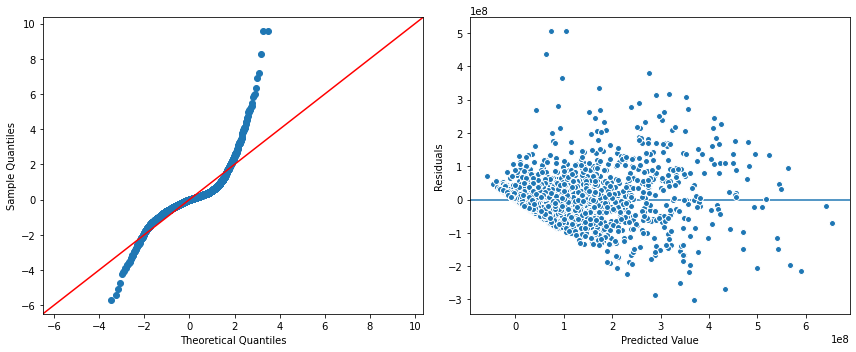

In [207]:
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_clean)
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

### Removing Outliers - Using IQR Rule

<AxesSubplot:xlabel='revenue'>

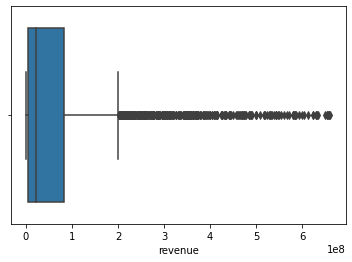

In [208]:
sns.boxplot(x = y_train)

In [209]:
def find_outliers_IQR(data, verbose=True):
    q3 = np.quantile(data,.75)
    q1 = np.quantile(data,.25)

    IQR = q3 - q1
    upper_threshold = q3 + 1.5*IQR
    lower_threshold = q1 - 1.5*IQR
    
    outliers = (data<lower_threshold) | (data>upper_threshold)
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using IQR.")
        
    return outliers

In [210]:
outliers_z = find_outliers(df['revenue'])
outliers_z

- 128 outliers found in revenue using Z-Scores.


4        False
6        False
9        False
10       False
11        True
         ...  
59859    False
59887    False
59923    False
59929    False
59937    False
Name: revenue, Length: 5081, dtype: bool

In [211]:
outliers_iqr = find_outliers_IQR(df['revenue'])
outliers_iqr

- 540 outliers found in revenue using IQR.


4         True
6        False
9        False
10       False
11        True
         ...  
59859    False
59887    False
59923    False
59929    False
59937    False
Name: revenue, Length: 5081, dtype: bool

In [212]:
## Loop to remove outliers from same columns using new function
outlier_cols = ['runtime','popularity','revenue']

## Empty dict for both types of outliers
outliers_z = {}
outliers_iqr = {}

## Use both functions to see the comparison for # of outliers
for col in outlier_cols:
    outliers_col_z = find_outliers(df[col])
    outliers_z[col] = outliers_col_z
    
    outliers_col_iqr = find_outliers_IQR(df[col])
    outliers_iqr[col] = outliers_col_iqr
    print()
    

- 0 outliers found in runtime using Z-Scores.
- 0 outliers found in runtime using IQR.

- 34 outliers found in popularity using Z-Scores.
- 518 outliers found in popularity using IQR.

- 128 outliers found in revenue using Z-Scores.
- 540 outliers found in revenue using IQR.



In [213]:
# remove_outliers using z-score
df_clean_z = df.copy()
for col, idx_outliers in outliers_z.items():
    df_clean_z = df_clean_z[~idx_outliers]
df_clean_z

/var/folders/7r/wd0l_4dd19d8nf97v9_7f9340000gn/T/ipykernel_206/1280488670.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean_z = df_clean_z[~idx_outliers]


adult  belongs_to_collection       budget  popularity      revenue  \
4       0.00                  False 260000000.00      119.17 592461732.00   
6       0.00                   True  30000000.00       70.69    967000.00   
9       0.00                  False  69000000.00       21.75  86387857.00   
10      0.00                  False 110000000.00       56.49 177238796.00   
14      0.00                  False  85000000.00       37.00  48000000.00   
...      ...                    ...          ...         ...          ...   
59859   0.00                   True   3500000.00        4.84   3704408.00   
59887   0.00                  False    300000.00        1.94    200000.00   
59923   0.00                   True       600.00        1.79         3.00   
59929   0.00                   True    125000.00        5.99   3470000.00   
59937   0.00                  False  10000000.00        6.69  21500000.00   

       runtime  vote_average  vote_count certification  Genre_Family  \
4       100.00          7.60     9364.00            PG          True   
6        92.00          5.40      553.00             R         False   
9       114.00          5.60     1452.00         PG-13         False   
10      117.00          6.40     3877.00         PG-13         False   
14      112.00          7.50     6331.00         PG-13         False   
...        ...           ...         ...           ...           ...   
59859    97.00          6.30       42.00           NaN         False   
59887   122.00          4.20       11.00           NaN         False   
59923    81.00          1.90       10.00           NaN         False   
59929    88.00          5.40       40.00           NaN         False   
59937   102.00          6.10      135.00            NR         False   

       Genre_Animation  Genre_Science Fiction  Genre_Thriller  Genre_Mystery  \
4                 True                  False           False          False   
6                False                   True            True          False   
9                False                  False           False          False   
10               False                  False            True          False   
14               False                  False           False          False   
...                ...                    ...             ...            ...   
59859            False                   True           False          False   
59887            False                  False           False           True   
59923            False                  False           False           True   
59929            False                  False           False          False   
59937            False                  False           False          False   

       Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  \
4            False          False         False      False        False   
6             True          False         False      False         True   
9            False          False          True      False        False   
10           False          False          True      False         True   
14           False           True          True      False        False   
...            ...            ...           ...        ...          ...   
59859        False          False         False      False        False   
59887         True          False         False      False        False   
59923        False          False         False      False        False   
59929        False          False         False      False        False   
59937        False          False         False      False        False   

       Genre_Action  Genre_Adventure  Genre_Horror  Genre_Fantasy  \
4             False            False         False          False   
6              True            False         False          False   
9             False            False         False          False   
10             True             True         False          False   
14        

In [214]:
# remove_outliers using iqr
df_clean_iqr = df.copy()
for col, idx_outliers in outliers_iqr.items():
    df_clean_iqr = df_clean_iqr[~idx_outliers]
df_clean_iqr

/var/folders/7r/wd0l_4dd19d8nf97v9_7f9340000gn/T/ipykernel_206/3541058093.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean_iqr = df_clean_iqr[~idx_outliers]


adult  belongs_to_collection       budget  popularity      revenue  \
9       0.00                  False  69000000.00       21.75  86387857.00   
10      0.00                  False 110000000.00       56.49 177238796.00   
14      0.00                  False  85000000.00       37.00  48000000.00   
17      0.00                  False  20000000.00       19.66  54956140.00   
22      0.00                   True  24000000.00       48.67  83188165.00   
...      ...                    ...          ...         ...          ...   
59859   0.00                   True   3500000.00        4.84   3704408.00   
59887   0.00                  False    300000.00        1.94    200000.00   
59923   0.00                   True       600.00        1.79         3.00   
59929   0.00                   True    125000.00        5.99   3470000.00   
59937   0.00                  False  10000000.00        6.69  21500000.00   

       runtime  vote_average  vote_count certification  Genre_Family  \
9       114.00          5.60     1452.00         PG-13         False   
10      117.00          6.40     3877.00         PG-13         False   
14      112.00          7.50     6331.00         PG-13         False   
17      101.00          6.20     1615.00             R         False   
22       88.00          5.40     1754.00             R         False   
...        ...           ...         ...           ...           ...   
59859    97.00          6.30       42.00           NaN         False   
59887   122.00          4.20       11.00           NaN         False   
59923    81.00          1.90       10.00           NaN         False   
59929    88.00          5.40       40.00           NaN         False   
59937   102.00          6.10      135.00            NR         False   

       Genre_Animation  Genre_Science Fiction  Genre_Thriller  Genre_Mystery  \
9                False                  False           False          False   
10               False                  False            True          False   
14               False                  False           False          False   
17               False                  False           False           True   
22               False                  False           False          False   
...                ...                    ...             ...            ...   
59859            False                   True           False          False   
59887            False                  False           False           True   
59923            False                  False           False           True   
59929            False                  False           False          False   
59937            False                  False           False          False   

       Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  \
9            False          False          True      False        False   
10           False          False          True      False         True   
14           False           True          True      False        False   
17           False          False         False      False        False   
22           False          False          True      False        False   
...            ...            ...           ...        ...          ...   
59859        False          False         False      False        False   
59887         True          False         False      False        False   
59923        False          False         False      False        False   
59929        False          False         False      False        False   
59937        False          False         False      False        False   

       Genre_Action  Genre_Adventure  Genre_Horror  Genre_Fantasy  \
9             False            False         False          False   
10             True             True         False          False   
14             True            False         False           True   
17             True            False          True          False   
22        

### Model 4 - IQR Outliers Removed

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     73.52
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        17:39:34   Log-Likelihood:                -60191.
No. Observations:                3229   AIC:                         1.205e+05
Df Residuals:                    3146   BIC:                         1.211e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_G                       20.5878      5.595      3.679      0.000       9.617      31.559
certification_MISSING                  0.7624      0.031     24.361      0.000       0.701       0.824
certification_NC-17                 5.357e+05   6.62e+04      8.095      0.000    4.06e+05    6.65e+05
certification_NR                    7.808e+04   3.01e+04      2.590      0.010     1.9e+04    1.37e+05
certification_PG                    6.318e+05   5.22e+05      1.210      0.226   -3.92e+05    1.66e+06
certification_PG-13                 1.191e+04    468.766     25.398      0.000     1.1e+04    1.28e+04
certification_R                    -4.022e+05   1.08e+05     -3.738      0.000   -6.13e+05   -1.91e+05
adult                              -1.781e+05   1.58e+05     -1.126      0.260   -4.88e+05    1.32e+05
budget                              6992.2060   6.36e+04      0.110      0.912   -1.18e+05    1.32e+05
popularity                          1.071e+08   2.71e+07      3.948      0.000    5.39e+07     1.6e+08
runtime                             9.965e+07   2.73e+07      3.651      0.000    4.61e+07    1.53e+08
vote_average                        9.594e+07   2.81e+07      3.409      0.001    4.08e+07    1.51e+08
vote_count                          9.759e+07   2.73e+07      3.569      0.000     4.4e+07    1.51e+08
year                                1.039e+08   2.71e+07      3.833      0.000    5.08e+07    1.57e+08
month                               1.027e+08   2.71e+07      3.794      0.000    4.96e+07    1.56e+08
day                                 8.969e+07    2.7e+07      3.319      0.001    3.67e+07    1.43e+08
belongs_to_collection               1.662e+07   1.62e+06     10.279      0.000    1.34e+07    1.98e+07
Genre_Family                        2.861e+06   2.69e+06      1.064      0.288   -2.41e+06    8.13e+06
Genre_Animation                     -3.95e+06   3.18e+06     -1.240      0.215   -1.02e+07    2.29e+06
Genre_Science Fiction              -1.649e+07   2.21e+06     -7.463      0.000   -2.08e+07   -1.22e+07
Genre_Thriller                      2.205e+05   1.51e+06      0.146      0.884   -2.73e+06    3.18e+06
Genre_Mystery                      -1.186e+06   2.11e+06     -0.563      0.574   -5.32e+06    2.95e+06
Genre_Drama                        -4.103e+06   1.41e+06     -2.918      0.004   -6.86e+06   -1.35e+06
Genre_Romance                       2.569e+06   1.53e+06      1.682      0.093   -4.26e+05    5.56e+06
Genre_Comedy                        5.093e+06   1.42e+06      3.585      0.000    2.31e+06    7.88e+06
Genre_War                           2.559e+06   3.11e+06      0.822      0.411   -3.54e+06    8.66e+06
Genre_Crime                         1.066e+05   1.71e+06      0.062      0.950   -3.24e+06    3.

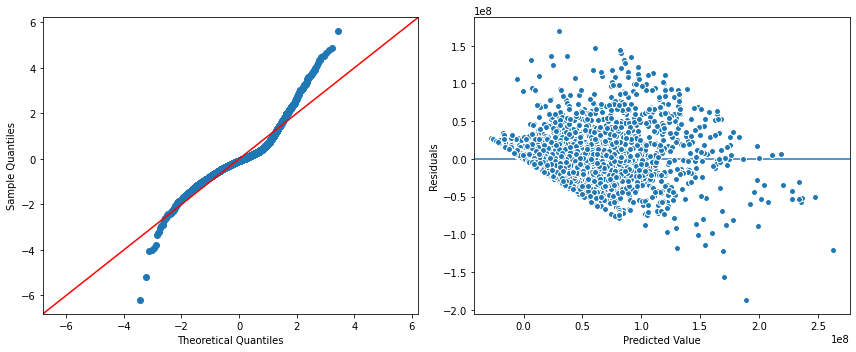

In [215]:
## MAKE NEW MODEL WITH IQR OUTLIERS REMOVED

X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_clean_iqr)
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

> How are we doing?

In [216]:
## get pvalues from model result
pvals = result.pvalues 
pvals

certification_G                      0.00
certification_MISSING                0.00
certification_NC-17                  0.00
certification_NR                     0.01
certification_PG                     0.23
                                     ... 
ProdComp_Village Roadshow Pictures   0.60
ProdComp_Walt Disney Pictures        0.00
ProdComp_Warner Bros. Pictures       0.43
ProdComp_Working Title Films         0.50
const                                0.00
Length: 87, dtype: float64

In [217]:
## Check for p-values that are >.05
pvals[ pvals>.05]

certification_PG                     0.23
adult                                0.26
budget                               0.91
Genre_Family                         0.29
Genre_Animation                      0.21
Genre_Thriller                       0.88
Genre_Mystery                        0.57
Genre_Romance                        0.09
Genre_War                            0.41
Genre_Crime                          0.95
Genre_Action                         0.47
Genre_Adventure                      0.20
Genre_Horror                         0.23
Genre_History                        0.82
Genre_Music                          0.16
Genre_Documentary                    0.36
ProdComp_BBC Films                   0.94
ProdComp_Blumhouse Productions       0.07
ProdComp_Canal+                      0.56
ProdComp_Ciné+                       0.74
ProdComp_Dimension Films             0.94
ProdComp_Focus Features              0.67
ProdComp_Fox 2000 Pictures           0.10
ProdComp_Fox Searchlight Pictures 

## Removing features - based on p-values

In [218]:
## Get list of ALL genre columns to see how many are sig
genre_cols = [c for c in df_clean.columns if c.startswith("Genre")]
genre_cols

['Genre_Family',
 'Genre_Animation',
 'Genre_Science Fiction',
 'Genre_Thriller',
 'Genre_Mystery',
 'Genre_Drama',
 'Genre_Romance',
 'Genre_Comedy',
 'Genre_War',
 'Genre_Crime',
 'Genre_Action',
 'Genre_Adventure',
 'Genre_Horror',
 'Genre_Fantasy',
 'Genre_History',
 'Genre_Western',
 'Genre_Music',
 'Genre_Documentary',
 'Genre_TV Movie']

In [219]:
## save just genre pvalues
genre_pvals = pvals[genre_cols] > 0.05
## calc what % are insig?
genre_pvals.value_counts(normalize = True)

True    0.68
False   0.32
dtype: float64

In [220]:
## Get list of ALL prod_comp columns to see how many are sig
comp_cols = [c for c in df_clean.columns if c.startswith("ProdComp")]
comp_cols

['ProdComp_20th Century Fox',
 'ProdComp_BBC Films',
 'ProdComp_Blumhouse Productions',
 'ProdComp_CJ Entertainment',
 'ProdComp_Canal+',
 'ProdComp_Ciné+',
 'ProdComp_Columbia Pictures',
 'ProdComp_Dimension Films',
 'ProdComp_DreamWorks Animation',
 'ProdComp_DreamWorks Pictures',
 'ProdComp_Dune Entertainment',
 'ProdComp_Epsilon Motion Pictures',
 'ProdComp_EuropaCorp',
 'ProdComp_Film4 Productions',
 'ProdComp_Focus Features',
 'ProdComp_Fox 2000 Pictures',
 'ProdComp_Fox Searchlight Pictures',
 'ProdComp_France 2 Cinéma',
 'ProdComp_France 3 Cinéma',
 'ProdComp_Ingenious Media',
 'ProdComp_Legendary Pictures',
 'ProdComp_Lionsgate',
 'ProdComp_MISSING',
 'ProdComp_Metro-Goldwyn-Mayer',
 'ProdComp_Millennium Films',
 'ProdComp_Miramax',
 'ProdComp_New Line Cinema',
 'ProdComp_New Regency Pictures',
 'ProdComp_Original Film',
 'ProdComp_Paramount',
 'ProdComp_Participant',
 'ProdComp_Regency Enterprises',
 'ProdComp_Relativity Media',
 'ProdComp_Revolution Studios',
 'ProdComp_Scot

In [221]:
## save just genre pvalues
comp_pvals = pvals[comp_cols] > 0.05
comp_pvals.value_counts(normalize = True)

True    0.60
False   0.40
dtype: float64

> both have >50% bad pvalues. You can drop both if you choose.

In [222]:
## what pvals are remaining?
other_pvals = pvals.drop([*comp_cols, *genre_cols])
other_pvals[other_pvals>.05]

certification_PG   0.23
adult              0.26
budget             0.91
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     57.33
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        17:42:08   Log-Likelihood:                -60496.
No. Observations:                3229   AIC:                         1.212e+05
Df Residuals:                    3147   BIC:                         1.217e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_G                     7.246e+05   7.17e+04     10.111      0.000    5.84e+05    8.65e+05
certification_MISSING               2.223e+05   3.33e+04      6.669      0.000    1.57e+05    2.88e+05
certification_NC-17                -9.196e+05   5.88e+05     -1.565      0.118   -2.07e+06    2.32e+05
certification_NR                    1.459e+04    521.047     28.001      0.000    1.36e+04    1.56e+04
certification_PG                   -5.526e+05   1.18e+05     -4.682      0.000   -7.84e+05   -3.21e+05
certification_PG-13                 1.074e+05   1.74e+05      0.618      0.536   -2.33e+05    4.48e+05
certification_R                     3.257e+04   6.97e+04      0.468      0.640   -1.04e+05    1.69e+05
popularity                          1.438e+08   2.98e+07      4.830      0.000    8.55e+07    2.02e+08
runtime                             1.345e+08      3e+07      4.488      0.000    7.57e+07    1.93e+08
vote_average                         1.27e+08   3.09e+07      4.108      0.000    6.64e+07    1.88e+08
vote_count                          1.352e+08      3e+07      4.511      0.000    7.65e+07    1.94e+08
year                                1.445e+08   2.97e+07      4.861      0.000    8.62e+07    2.03e+08
month                               1.436e+08   2.97e+07      4.835      0.000    8.53e+07    2.02e+08
day                                 1.273e+08   2.97e+07      4.290      0.000    6.91e+07    1.86e+08
belongs_to_collection                1.47e+07   1.78e+06      8.236      0.000    1.12e+07    1.82e+07
Genre_Family                        8.295e+06   2.97e+06      2.797      0.005    2.48e+06    1.41e+07
Genre_Animation                     1.449e+06   3.59e+06      0.403      0.687    -5.6e+06    8.49e+06
Genre_Science Fiction               -1.28e+07   2.46e+06     -5.196      0.000   -1.76e+07   -7.97e+06
Genre_Thriller                      2.349e+06   1.66e+06      1.415      0.157   -9.06e+05     5.6e+06
Genre_Mystery                      -7.414e+05   2.26e+06     -0.328      0.743   -5.17e+06    3.68e+06
Genre_Drama                        -5.651e+06   1.54e+06     -3.663      0.000   -8.68e+06   -2.63e+06
Genre_Romance                        3.29e+06   1.67e+06      1.973      0.049    1.98e+04    6.56e+06
Genre_Comedy                         7.17e+06   1.55e+06      4.636      0.000    4.14e+06    1.02e+07
Genre_War                           8.957e+06   3.35e+06      2.677      0.007     2.4e+06    1.55e+07
Genre_Crime                        -1.644e+06   1.86e+06     -0.886      0.376   -5.28e+06       2e+06
Genre_Action                        3.481e+06   1.67e+06      2.082      0.037    2.03e+05    6.76e+06
Genre_Adventure                     3.553e+06    2.1e+06      1.692      0.091   -5.63e+05    7.

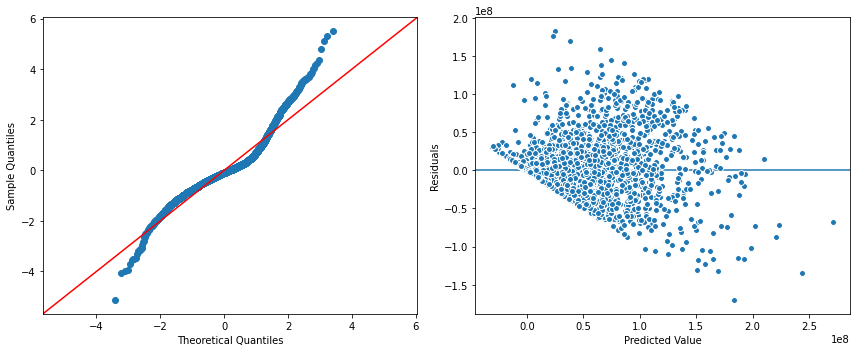

In [223]:
## Make x,y vars, but drop features with bad pvalues
df_clean_iqr = df_clean_iqr.drop(columns=['adult','budget'])
X_train_df, y_train, X_test_df, y_test = \
                                get_train_test_split(df_clean_iqr,)
## MAKE AND EVALUATE OLS
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

# Addressing Multicollinearity

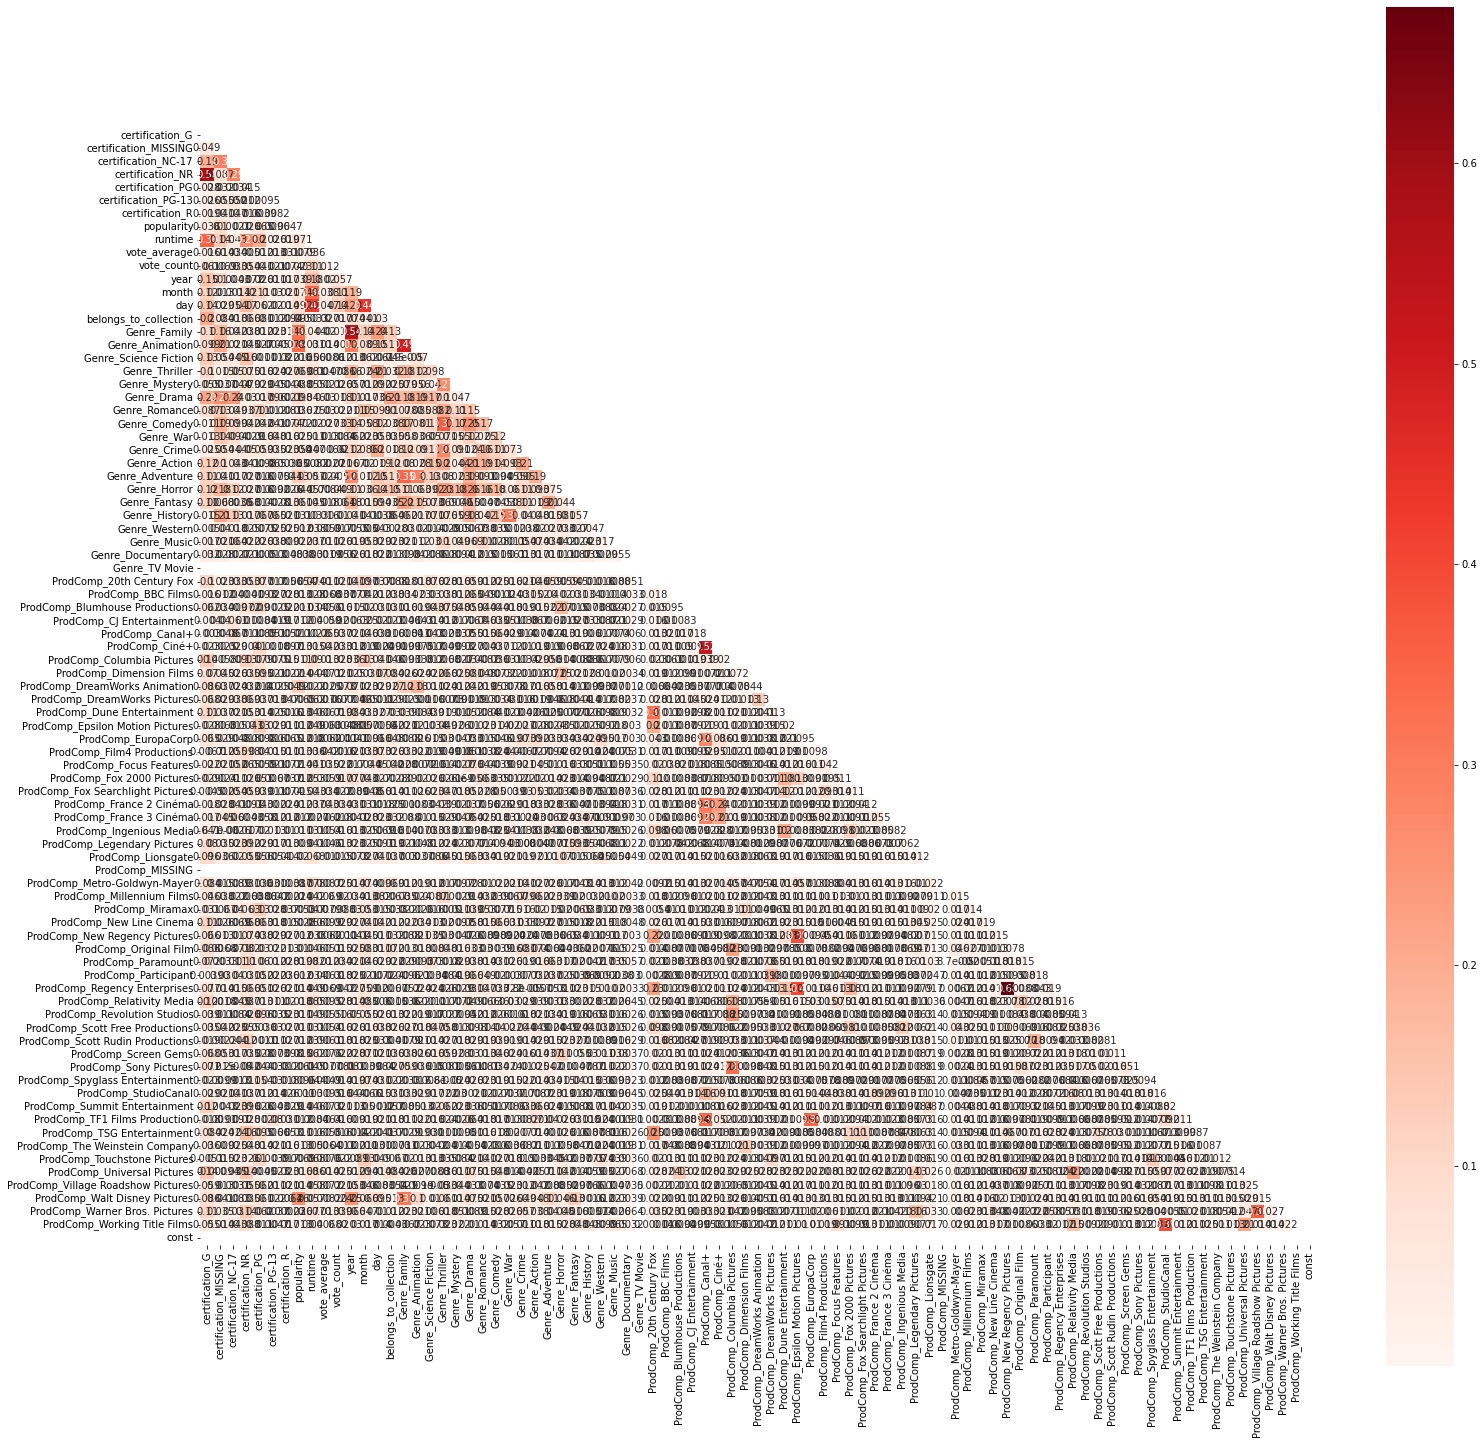

In [224]:
## Calculating the mask to hide the upper-right of the triangle
plt.figure(figsize=(25,25))
corr = X_train_df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

## Variance Inflation Factor

In [225]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
# separate just x-data and subtract mean
features = X_train_df -  X_train_df.mean()

features

certification_G  certification_MISSING  certification_NC-17  \
48144           -11.87                   2.48                -0.93   
15558           -15.06                  11.48                 3.77   
57                8.11                  16.48                -0.33   
8910             -1.81                 -14.52                -0.53   
15781            41.88                  38.48                 1.57   
...                ...                    ...                  ...   
30989           -10.64                   2.48                 0.47   
45401            -0.95                  -3.52                 0.47   
45557            -2.36                  14.48                 0.37   
53944            -0.53                  16.48                 0.47   
5510             15.12                 -14.52                -0.83   

       certification_NR  certification_PG  certification_PG-13  \
48144          -1089.42             -7.24                 3.18   
15558          -1102.42              3.76                 2.18   
57              1573.58             -0.24                -4.82   
8910            -788.42              2.76                 2.18   
15781           2071.58              4.76                 1.18   
...                 ...               ...                  ...   
30989          -1047.42              7.76                 3.18   
45401           -510.42             -9.24                 2.18   
45557           -383.42             -9.24                -5.82   
53944           -636.42             -3.24                 2.18   
5510             186.58              1.76                 3.18   

       certification_R  popularity  runtime  vote_average  vote_count  year  \
48144           -10.31       -0.02     0.75         -0.00       -0.03 -0.09   
15558             6.69       -0.02     0.75         -0.00       -0.03 -0.09   
57               -5.31       -0.02    -0.25         -0.00       -0.03 -0.09   
8910             -1.31       -0.02    -0.25         -0.00       -0.03 -0.09   
15781            -4.31       -0.02    -0.25         -0.00       -0.03 -0.09   
...                ...         ...      ...           ...         ...   ...   
30989           -12.31       -0.02     0.75         -0.00       -0.03 -0.09   
45401           -11.31       -0.02    -0.25         -0.00       -0.03 -0.09   
45557             3.69       -0.02    -0.25         -0.00       -0.03 -0.09   
53944             4.69       -0.02    -0.25         -0.00       -0.03 -0.09   
5510             -5.31       -0.02    -0.25         -0.00       -0.03 -0.09   

       month   day  belongs_to_collection  Genre_Family  Genre_Animation  \
48144  -0.26 -0.35                  -0.15         -0.09            -0.05   
15558  -0.26 -0.35                  -0.15         -0.09            -0.05   
57      0.74 -0.35                  -0.15         -0.09            -0.05   
8910   -0.26  0.65                  -0.15         -0.09            -0.05   
15781  -0.26  0.65                  -0.15         -0.09            -0.05   
...      ...   ...                    ...           ...              ...   
30989  -0.26 -0.35                  -0.15         -0.09            -0.05   
45401  -0.26  0.65                  -0.15         -0.09            -0.05   
45557  -0.26  0.65                  -0.15         -0.09            -0.05   
53944  -0.26  0.65                  -0.15         -0.09            -0.05   
5510   -0.26  0.65                   0.85         -0.09            -0.05   

       Genre_Science Fiction  Genre_Thriller  Genre_Mystery  Genre_Drama  \
48144                  -0.07           -0.26          -0.09         0.46   
15558                  -0.07           -0.26          -0.09         0.46   
57                     -0.07           -0.26          -0.09        -0.54   
8910                   -0.07           -0.26          -0.09        -0.54   
15781                  -0.07           -0.26          -0.09         0.46   
...                      ...             ...           

In [226]:
# create a list of VIF scores for each feature in features.
vif_scores = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

# create a new series to hold the VIF scores 
VIF = pd.Series(vif_scores, index=features.columns)
VIF

/usr/local/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


certification_G                      2.05
certification_MISSING                1.38
certification_NC-17                  1.33
certification_NR                     1.90
certification_PG                     1.27
                                     ... 
ProdComp_Village Roadshow Pictures   1.18
ProdComp_Walt Disney Pictures        1.26
ProdComp_Warner Bros. Pictures       1.28
ProdComp_Working Title Films         1.30
const                                 NaN
Length: 85, dtype: float64

In [227]:
## Sort VIF for inspect
VIF.sort_values()

Genre_Documentary                1.01
certification_R                  1.03
ProdComp_CJ Entertainment        1.03
ProdComp_The Weinstein Company   1.04
ProdComp_BBC Films               1.04
                                 ... 
runtime                           inf
popularity                        inf
Genre_TV Movie                    NaN
ProdComp_MISSING                  NaN
const                             NaN
Length: 85, dtype: float64

In [228]:
## Set float format to view vals not in scientfic notation
pd.set_option('display.float_format',lambda x: f'{x:.2f}')

In [229]:
## remove infinite values from VIF and sort
VIF = VIF[VIF!=np.inf].sort_values()
VIF

Genre_Documentary                1.01
certification_R                  1.03
ProdComp_CJ Entertainment        1.03
ProdComp_The Weinstein Company   1.04
ProdComp_BBC Films               1.04
                                 ... 
ProdComp_Regency Enterprises     2.06
Genre_Family                     2.12
Genre_TV Movie                    NaN
ProdComp_MISSING                  NaN
const                             NaN
Length: 78, dtype: float64

In [230]:
## filter for VIF that are > 5
VIF[VIF>5]

Series([], dtype: float64)

In [231]:
high_vif = VIF[VIF>5].index
high_vif

Index([], dtype='object')

### FInal Model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     54.35
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        17:44:26   Log-Likelihood:                -60473.
No. Observations:                3229   AIC:                         1.211e+05
Df Residuals:                    3147   BIC:                         1.216e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_G                     7.068e+05   7.21e+04      9.806      0.000    5.65e+05    8.48e+05
certification_MISSING               2.466e+05   3.27e+04      7.545      0.000    1.82e+05    3.11e+05
certification_NC-17                -1.219e+06   5.61e+05     -2.175      0.030   -2.32e+06    -1.2e+05
certification_NR                    1.492e+04    538.606     27.701      0.000    1.39e+04     1.6e+04
certification_PG                   -5.364e+05   1.17e+05     -4.570      0.000   -7.67e+05   -3.06e+05
certification_PG-13                 2.053e+05   1.73e+05      1.184      0.237   -1.35e+05    5.45e+05
certification_R                    -1.104e+04   6.87e+04     -0.161      0.872   -1.46e+05    1.24e+05
popularity                          1.345e+08   2.97e+07      4.535      0.000    7.64e+07    1.93e+08
runtime                             1.315e+08   2.98e+07      4.410      0.000     7.3e+07     1.9e+08
vote_average                        1.204e+08    3.1e+07      3.888      0.000    5.97e+07    1.81e+08
vote_count                           1.29e+08   2.98e+07      4.327      0.000    7.05e+07    1.87e+08
year                                1.428e+08   2.96e+07      4.827      0.000    8.48e+07    2.01e+08
month                               1.414e+08   2.95e+07      4.786      0.000    8.35e+07    1.99e+08
day                                 1.257e+08   2.95e+07      4.262      0.000    6.79e+07    1.84e+08
belongs_to_collection                 1.4e+07   1.78e+06      7.883      0.000    1.05e+07    1.75e+07
Genre_Family                        7.157e+06   3.07e+06      2.327      0.020    1.13e+06    1.32e+07
Genre_Animation                     3.304e+06   3.57e+06      0.926      0.354   -3.69e+06    1.03e+07
Genre_Science Fiction              -1.236e+07   2.42e+06     -5.114      0.000   -1.71e+07   -7.62e+06
Genre_Thriller                      1.102e+06   1.68e+06      0.656      0.512   -2.19e+06     4.4e+06
Genre_Mystery                      -9.312e+05   2.27e+06     -0.410      0.682   -5.39e+06    3.53e+06
Genre_Drama                        -5.763e+06   1.52e+06     -3.797      0.000   -8.74e+06   -2.79e+06
Genre_Romance                       1.842e+06   1.66e+06      1.110      0.267   -1.41e+06     5.1e+06
Genre_Comedy                        7.052e+06   1.54e+06      4.584      0.000    4.04e+06    1.01e+07
Genre_War                           8.941e+06   3.34e+06      2.678      0.007     2.4e+06    1.55e+07
Genre_Crime                         4.285e+05   1.86e+06      0.230      0.818   -3.22e+06    4.08e+06
Genre_Action                        3.733e+06   1.68e+06      2.222      0.026    4.38e+05    7.03e+06
Genre_Adventure                     3.717e+06   2.08e+06      1.783      0.075   -3.71e+05     7

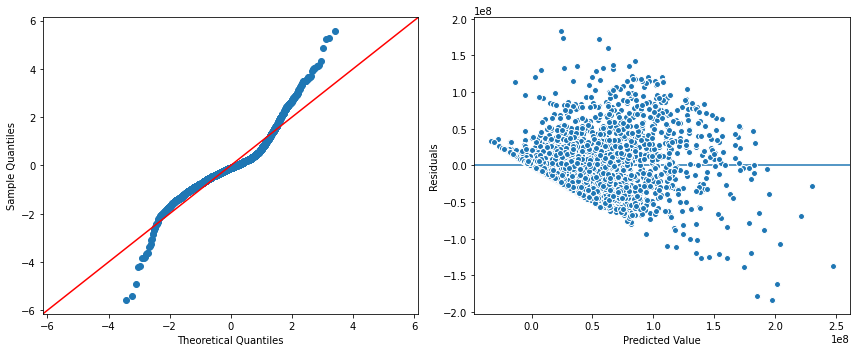

In [232]:
## make new df_final copy of prev df
df_final = df_clean_iqr.drop(columns =high_vif).copy()
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_final)
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

In [233]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.583
Testing R^2: 0.575


### Visualizing Coeffiicents

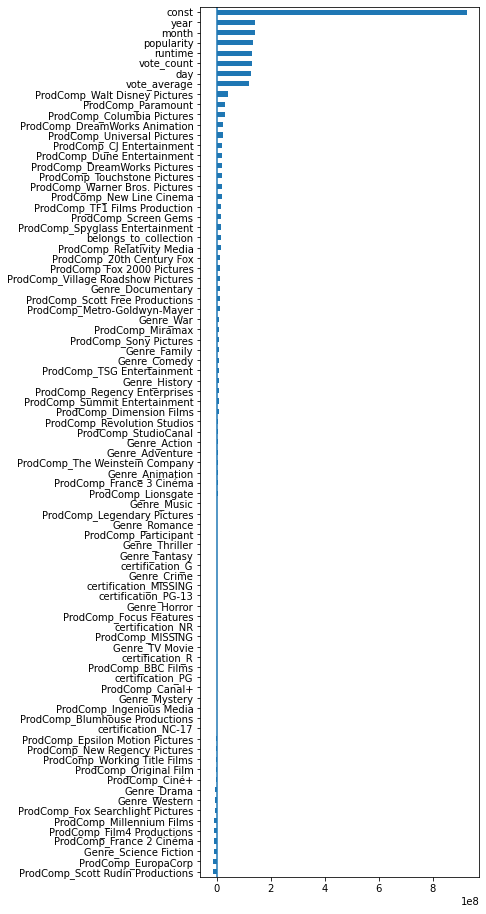

In [234]:
plt.figure(figsize=(5,16))
ax =result.params.sort_values().plot(kind='barh')
ax.axvline()

## Comparing Linear Reg to RandomForest

In [235]:
from sklearn.ensemble import RandomForestRegressor
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df)

reg = RandomForestRegressor(verbose=1,random_state=42)
reg.fit(X_train_df, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


RandomForestRegressor(random_state=42, verbose=1)

In [236]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = reg.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = reg.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.970
Testing R^2: 0.810


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


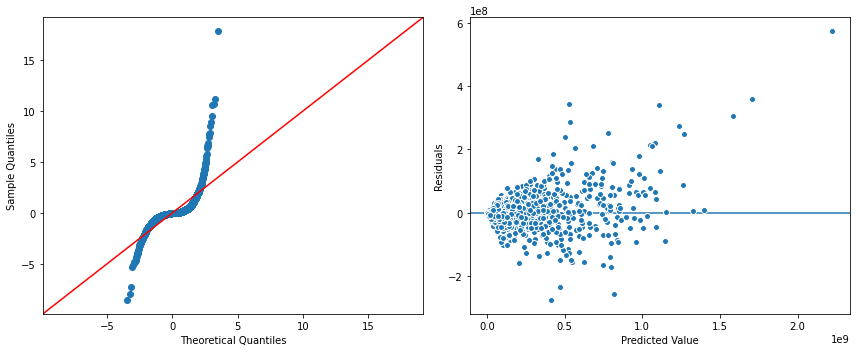

In [237]:
evaluate_ols(reg, X_train_df, y_train)

<AxesSubplot:>

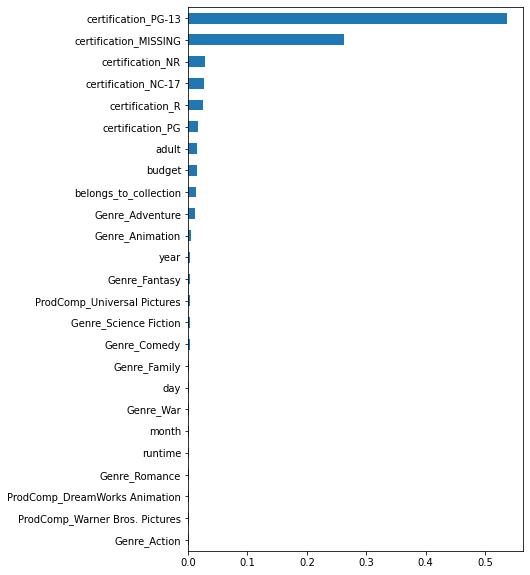

In [238]:
importances = pd.Series(reg.feature_importances_, index=X_train_df.columns)
importances.sort_values().tail(25).plot(kind='barh',figsize=(6,10))

# Summary

- Diagnosing linear regression models is an iterative process that can drive you mad if you let it. 

- Our final model is "good enough" for me to extract some business recommendations. 